In [2072]:
###importing sqlite3
import sqlite3

In [2073]:
## Connecting sqlite to the database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [2074]:
cur = con.cursor()

In [2075]:
### Checking the columns and typpe in accident table
col_info = cur.execute(f"PRAGMA table_info(accident)")

In [2076]:
col_info.fetchall()

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [2077]:
## Checking columns in vehicle table
col1_info = cur.execute(f"PRAGMA table_info(vehicle)")
col1_info.fetchall()

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [2078]:

#Checking columns in casualty table
col2_info = cur.execute(f"PRAGMA table_info(casualty)")
col2_info.fetchall()

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [2079]:
## Columns in lsoa table
col3_info = cur.execute(f"PRAGMA table_info(lsoa)")
col3_info.fetchall()

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

## The age of the oldest driver/rider in the casualty table

In [2080]:
### Selecting oldest age of driver/rider which is represented by 1 from the form guide
cur.execute(f"SELECT MAX(age_of_casualty) FROM casualty WHERE casualty_class = 1")

### Fetching just first column of the query
age_of_oldest_driver = cur.fetchone()[0]

print("Age of the oldest driver is", age_of_oldest_driver, "years")

Age of the oldest driver is 101 years


## The total number of vehicle_type = 19 vehicles in the vehicle table

In [2081]:
### Counting all vehicle with code 19
cur.execute(f"SELECT COUNT(*) FROM vehicle WHERE vehicle_type = 19")
Total_vehicle_19 = cur.fetchone()[0]
print("Total vehicle type with code 19 is:", Total_vehicle_19, "vehicles")

Total vehicle type with code 19 is: 47458 vehicles


## Joining sex of driver, sex of casualty, speed limit and age of vehicle and dataframing the result

In [2082]:
## Importing pandas for dataframing
import pandas as pd

### Defining the sub-query
sub_query = '''SELECT accident.speed_limit, vehicle.age_of_vehicle,
       vehicle.sex_of_driver, casualty.sex_of_casualty 
       FROM accident
       JOIN vehicle ON accident.accident_index = vehicle.accident_index
       JOIN casualty ON accident.accident_index = casualty.accident_index
       JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
       WHERE lsoa.lsoa01nm LIKE "%Kingston Upon Hull%"'''


# Using pandas to put the 'sub_query' in a dataframe
sub_query_df = pd.read_sql_query(sub_query, con)

sub_query_df.head()

,speed_limit,age_of_vehicle,sex_of_driver,sex_of_casualty
0,30,13,1,1
1,30,9,1,1
2,30,6,3,1
3,30,6,3,2
4,30,11,1,1


## Getting the total number of rows

In [2083]:
number_of_rows = sub_query_df.shape[0]
print("Total number of rows for the extracted data is:", number_of_rows)

Total number of rows for the extracted data is: 6387


# EXPLORATORY DATA ANALYSIS

## Converting all tables to dataframe

In [2084]:
## Extracting the accident data for just year 2020
accident = '''SELECT * FROM accident WHERE accident_year = 2020'''
accident_df = pd.read_sql_query(accident, con)
accident_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [2085]:
vehicle = '''SELECT * FROM vehicle WHERE accident_year = 2020 '''
vehicle_df = pd.read_sql_query(vehicle, con)
vehicle_df.head()

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [2086]:
casualty = '''SELECT * FROM casualty WHERE accident_year = 2020'''
casualty_df = pd.read_sql_query(casualty, con)
casualty_df.head()

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


In [2087]:
lsoa = '''SELECT * FROM lsoa'''
lsoa_df = pd.read_sql_query(lsoa, con)
lsoa_df.head()

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311


In [2088]:
lsoa_df

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [2089]:
## Checking the info on the data
accident_df.info()
vehicle_df.info()
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

##### OBSERVATION
* accident_df date column is object. it should be in date type format
* Time is also in object

In [2090]:
## Changing the data tyoe of accident date column
accident_df['date'] = pd.to_datetime(accident_df['date'], format='%d/%m/%Y')
### checking if it changed
accident_df['date'].dtype

dtype('<M8[ns]')

In [2091]:
accident_df['date']

0       2020-02-04
1       2020-04-27
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
91194   2020-08-12
91195   2020-11-13
91196   2020-04-15
91197   2020-12-15
91198   2020-08-25
Name: date, Length: 91199, dtype: datetime64[ns]

In [2092]:
## checking time column
accident_df['time'].head(10)

0    09:00
1    13:55
2    01:25
3    01:50
4    02:25
5    01:30
6    03:43
7    03:00
8    04:00
9    03:25
Name: time, dtype: object

In [2093]:
## Converting it to datetime format
accident_df['time'] = pd.to_datetime(accident_df['time'], format='%H:%M').dt.time
accident_df['time'].head(10)

0    09:00:00
1    13:55:00
2    01:25:00
3    01:50:00
4    02:25:00
5    01:30:00
6    03:43:00
7    03:00:00
8    04:00:00
9    03:25:00
Name: time, dtype: object

In [2094]:
accident_df['day_of_week'].head(10)

0    3
1    2
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: day_of_week, dtype: int64

In [2095]:
accident_df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,91199.0,91185.000000,9.118500e+04,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,456487.876416,2.737645e+05,-1.189258,52.351073,27.488043,2.768232,1.835272,1.267382,4.121558,...,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205,1.415268,1.721521
std,0.0,93512.711807,1.473516e+05,1.367786,1.327573,24.548964,0.456682,0.677272,0.681473,1.932200,...,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031,0.665469,0.801491
min,2020.0,65947.000000,1.271500e+04,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
25%,2020.0,392890.000000,1.745690e+05,-2.107789,51.457237,4.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2020.0,465545.000000,2.085990e+05,-1.046912,51.763385,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2020.0,530168.000000,3.783660e+05,-0.125238,53.297386,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.0,655138.000000,1.184351e+06,1.756257,60.541144,99.000000,3.000000,13.000000,41.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [2096]:
### checking null values in accident 
accident_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [2097]:
## Checking for number of unique values
accident_df.nunique()

accident_index                                 91199
accident_year                                      1
accident_reference                             91199
location_easting_osgr                          75403
location_northing_osgr                         75498
longitude                                      89589
latitude                                       88748
police_force                                      44
accident_severity                                  3
number_of_vehicles                                13
number_of_casualties                              16
date                                             366
day_of_week                                        7
time                                            1438
local_authority_district                         377
local_authority_ons_district                     378
local_authority_highway                          206
first_road_class                                   6
first_road_number                             

# ANALYSIS 

## 1. Significant hours of the day, and days of the week, on which accidents occur

To get this i will extract just the columns of time and day of the week and map the digits to the corresponding name of the week. Also, aprroximating

In [2098]:
### Extracting just the time and day of week column from accident_df to an new datafram accident_dayTime
accident_DayTime = accident_df[['time', 'day_of_week']]
accident_DayTime.head()

,time,day_of_week
0,09:00:00,3
1,13:55:00,2
2,01:25:00,4
3,01:50:00,4
4,02:25:00,4


In [2099]:
# checking unique values
accident_DayTime['day_of_week'].unique()

array([3, 2, 4, 5, 6, 7, 1])

In [2100]:
## Extracting just the hour using the lambda function
accident_DayTime['hour_of_accident'] = accident_DayTime['time'].apply(lambda x: x.hour)

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/1459332287.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2101]:
# Creating a mapping dictionary
day_dictionary = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

accident_DayTime['day_of_weekname'] = accident_DayTime['day_of_week'].map(day_dictionary)

weekdays_name = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accident_DayTime['day_of_weekname'] = pd.Categorical(accident_DayTime['day_of_weekname'], categories=weekdays_name, ordered=True)

accident_DayTime.head()

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/3045440111.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/3045440111.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,day_of_week,hour_of_accident,day_of_weekname
0,09:00:00,3,9,Tuesday
1,13:55:00,2,13,Monday
2,01:25:00,4,1,Wednesday
3,01:50:00,4,1,Wednesday
4,02:25:00,4,2,Wednesday


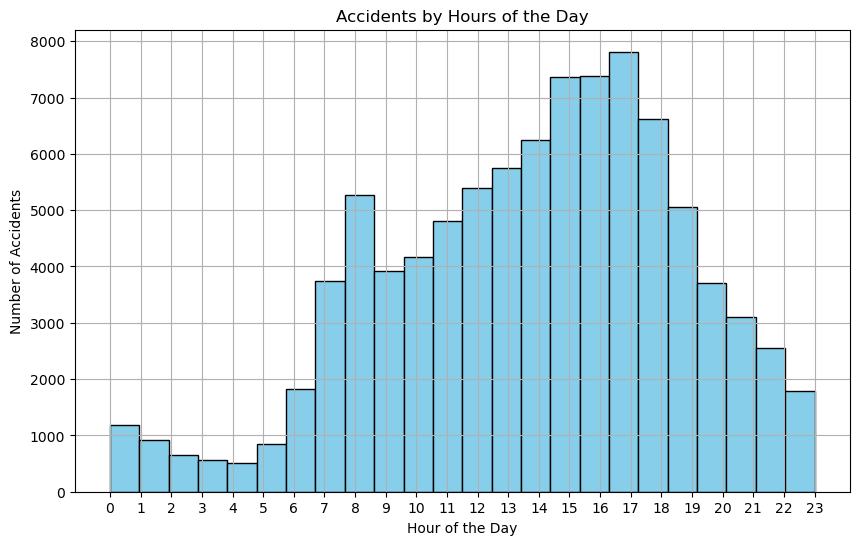

In [2102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(accident_DayTime['hour_of_accident'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hours of the Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()

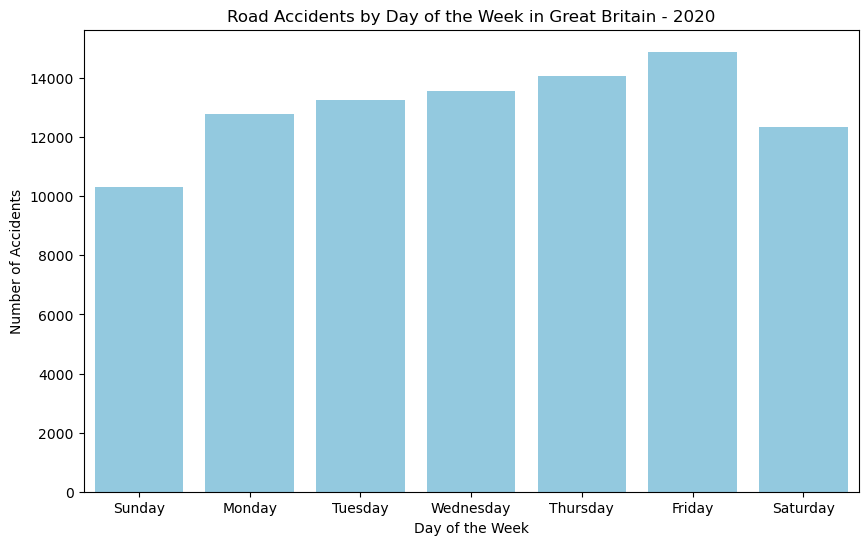

In [2103]:
import seaborn as sns

no_of_accidents = accident_DayTime['day_of_weekname'].value_counts()
plt.figure(figsize = (10, 6))
sns.barplot(x = no_of_accidents.index, y = no_of_accidents.values, order = day_dictionary.values(), color = 'skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Road Accidents by Day of the Week in Great Britain - 2020')
#plt.grid(True)
plt.show()


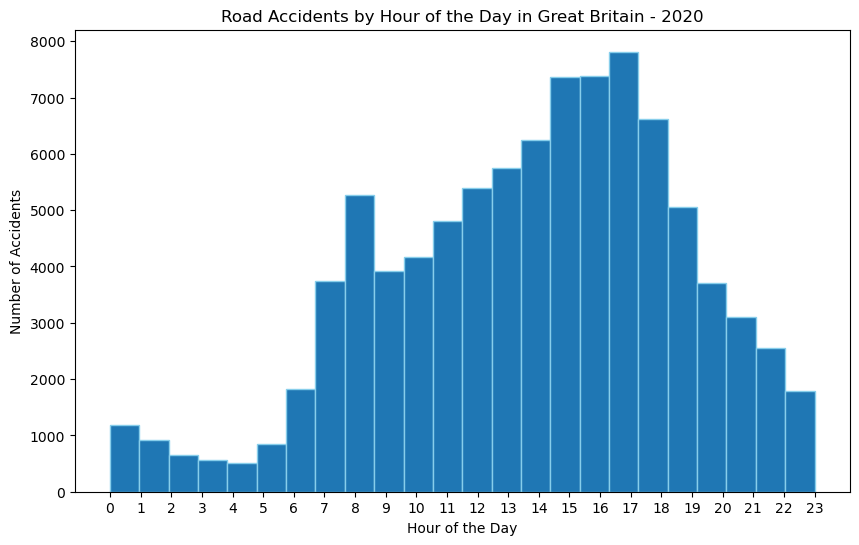

In [2104]:
plt.figure(figsize=(10, 6))
plt.hist(accident_DayTime['hour_of_accident'], bins=24, edgecolor='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Road Accidents by Hour of the Day in Great Britain - 2020')
plt.xticks(range(0, 24))
plt.show()

## 2. Are there significant hours of the day, and days of the week, on which accidents occur for motorbikes?

In [2105]:
# Merging accident and vehicle df on accident_index using pd.merge() function
accidentVehicle_df = pd.merge(accident_df, vehicle_df, on='accident_index', how='inner')

# I filtered to get the data for the types of motorcycle i want
motorcycle_df = accidentVehicle_df[accidentVehicle_df['vehicle_type'].isin([3, 4, 5])]

# Printing the head to view motorcycle_df dataframe
motorcycle_df.head()


,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
12,2020010228020,2020,010228020,529718.0,192342.0,-0.127840,51.614971,1,3,2,...,6,1,37,7,114,1,5,YAMAHA XC115,8,1
33,2020010228086,2020,010228086,531043.0,176304.0,-0.114680,51.470537,1,3,1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
36,2020010228097,2020,010228097,528428.0,179923.0,-0.150994,51.503659,1,3,2,...,6,1,20,4,125,1,4,PEUGEOT TWEET 125,6,1
58,2020010228148,2020,010228148,518467.0,185248.0,-0.292651,51.553691,1,3,1,...,6,1,20,4,125,1,0,HONDA GLR 125,2,1
77,2020010228207,2020,010228207,527038.0,170583.0,-0.174362,51.420033,1,3,2,...,6,1,22,5,125,1,9,HONDA WW125,7,1


In [2106]:
### Extracting just the time and day of week column from motocycles_df 
motorcycle_df_DayTime = motorcycle_df[['time', 'day_of_week']]
motorcycle_df_DayTime.head()

,time,day_of_week
12,03:25:00,4
33,14:00:00,4
36,14:37:00,4
58,19:05:00,4
77,14:29:00,4


In [2107]:
## Extracting just the hour using the lambda function
motorcycle_df_DayTime['hour_of_accident'] = motorcycle_df_DayTime['time'].apply(lambda x: x.hour)

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/4169495747.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2108]:

motorcycle_df_DayTime['day_of_weekname'] = motorcycle_df_DayTime['day_of_week'].map(day_dictionary)


motorcycle_df_DayTime['day_of_weekname'] = pd.Categorical(motorcycle_df_DayTime['day_of_weekname'], categories=weekdays_name, ordered=True)

motorcycle_df_DayTime.head()

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/2749145648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/2749145648.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,day_of_week,hour_of_accident,day_of_weekname
12,03:25:00,4,3,Wednesday
33,14:00:00,4,14,Wednesday
36,14:37:00,4,14,Wednesday
58,19:05:00,4,19,Wednesday
77,14:29:00,4,14,Wednesday


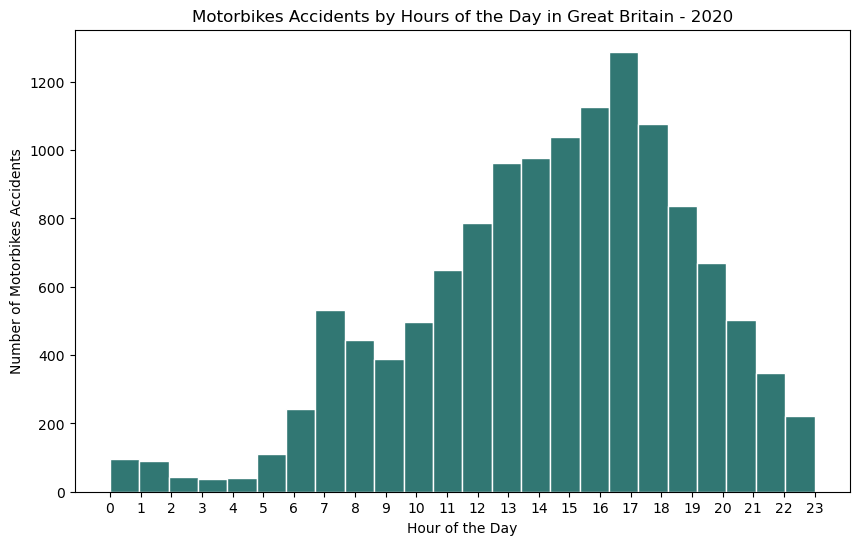

In [2109]:
plt.figure(figsize=(10, 6))
plt.hist(motorcycle_df_DayTime['hour_of_accident'], bins=24, color='#317773', edgecolor='white')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Motorbikes Accidents')
plt.title('Motorbikes Accidents by Hours of the Day in Great Britain - 2020')
plt.xticks(range(24))
#plt.grid(True)
plt.show()

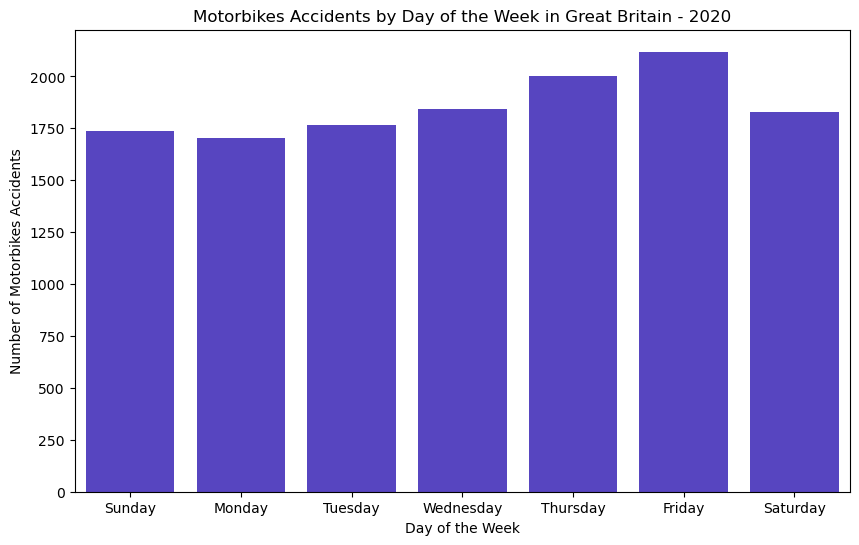

In [2110]:
no_of_motorbikes_accidents = motorcycle_df_DayTime['day_of_weekname'].value_counts()
plt.figure(figsize = (10, 6))
sns.barplot(x = no_of_motorbikes_accidents.index, y = no_of_motorbikes_accidents.values, order = day_dictionary.values(), color = '#4831D4')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Motorbikes Accidents')
plt.title('Motorbikes Accidents by Day of the Week in Great Britain - 2020')
#plt.grid(True)
plt.show()

## 3. are there significant hours of the day, and days of the week, on which pedestrians are more likely to be involved?

In [2111]:
# Merging accident and casualty df on accident_index using pd.merge() function
accidentCasualty_df = pd.merge(accident_df, casualty_df, on='accident_index', how='inner')

# filtering the merged dataframe by casualty type pedestrian
pedestrian_df = accidentCasualty_df[accidentCasualty_df['casualty_type'] == 1]

# Printing the head to view pedestrian_df dataframe
pedestrian_df.head()


,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
35,2020010228120,2020,010228120,532527.0,164076.0,-0.097893,51.360301,1,2,2,...,7,2,0,0,0,0,0,1,2,4
52,2020010228170,2020,010228170,533506.0,184362.0,-0.076192,51.542374,1,3,2,...,9,3,0,0,0,0,0,1,1,2
53,2020010228181,2020,010228181,532341.0,178205.0,-0.095292,51.487318,1,2,3,...,8,2,0,0,0,0,0,1,1,2
66,2020010228239,2020,010228239,547790.0,186225.0,0.130422,51.555557,1,3,2,...,6,3,0,0,0,0,0,1,-1,-1
71,2020010228255,2020,010228255,532469.0,164487.0,-0.098573,51.364009,1,2,2,...,7,2,0,0,0,0,0,1,1,4


In [2112]:
### Extracting just the time and day of week column from pedestrian_df 
pedestrian_df_DayTime = pedestrian_df[['time', 'day_of_week']]
pedestrian_df_DayTime.head()

,time,day_of_week
35,19:43:00,4
52,08:55:00,5
53,08:46:00,5
66,15:37:00,5
71,15:46:00,5


In [2113]:
## Extracting just the hour using the lambda function
pedestrian_df_DayTime['hour_of_accident'] = pedestrian_df_DayTime['time'].apply(lambda x: x.hour)

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/2612962860.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2114]:
## Mapping days of the week to there various names
pedestrian_df_DayTime['day_of_weekname'] = pedestrian_df_DayTime['day_of_week'].map(day_dictionary)


pedestrian_df_DayTime['day_of_weekname'] = pd.Categorical(pedestrian_df_DayTime['day_of_weekname'], categories=weekdays_name, ordered=True)

pedestrian_df_DayTime.head()

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/403615457.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/403615457.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,day_of_week,hour_of_accident,day_of_weekname
35,19:43:00,4,19,Wednesday
52,08:55:00,5,8,Thursday
53,08:46:00,5,8,Thursday
66,15:37:00,5,15,Thursday
71,15:46:00,5,15,Thursday


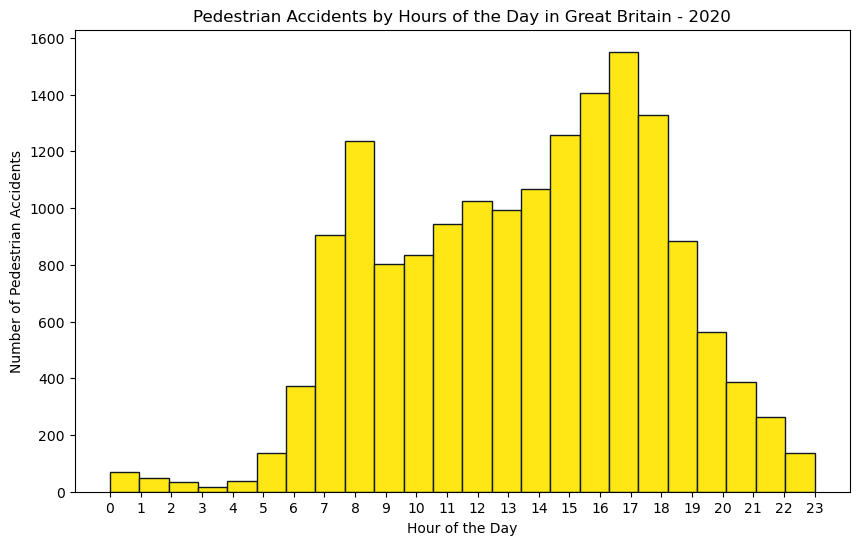

In [2115]:
plt.figure(figsize=(10, 6))
plt.hist(pedestrian_df_DayTime['hour_of_accident'], bins=24, color='#FEE715FF', edgecolor='#101820FF')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pedestrian Accidents')
plt.title('Pedestrian Accidents by Hours of the Day in Great Britain - 2020')
plt.xticks(range(24))
#plt.grid(True)
plt.show()

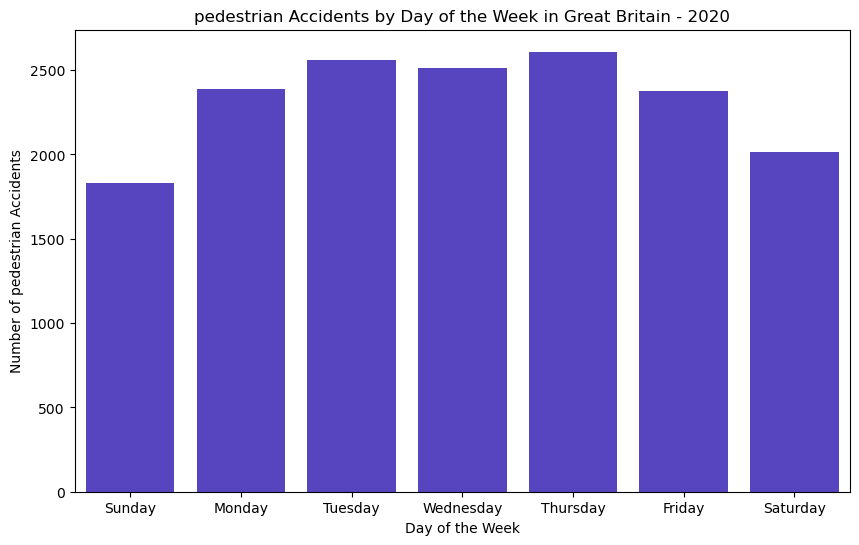

In [2116]:
no_of_pedestrian_accidents = pedestrian_df_DayTime['day_of_weekname'].value_counts()
plt.figure(figsize = (10, 6))
sns.barplot(x = no_of_pedestrian_accidents.index, y = no_of_pedestrian_accidents.values, order = day_dictionary.values(), color = '#4831D4')
plt.xlabel('Day of the Week')
plt.ylabel('Number of pedestrian Accidents')
plt.title('pedestrian Accidents by Day of the Week in Great Britain - 2020')
#plt.grid(True)
plt.show()

## 4. impact of selected variables on accident severity

for this the impact of ROAD TYPE, LIGHT CONDITIONS and ROAD SURFACE CONDITION on ACCIDENT SEVERIty will be analysed using apriori algorithm

In [2117]:
#checking for unique values in severity
accident_df['accident_severity'].unique()

array([3, 2, 1])

In [2118]:
#checking for null in severity
accident_df['accident_severity'].isna().unique()

array([False])

In [2119]:
## Checking the unique value of road surface condition to ensure it matches those on the road accident statistic form
accident_df['road_surface_conditions'].unique()

array([ 9,  1,  2,  5,  4,  3, -1])

In [2120]:
## -1 from the guide is missing data or out of range
## I will then check the weather condition for the corresponding road surface condition and replace -1 for what is appropriate
## for example raining with high winds will make the road surface condition to be wet/damp surface

accident_df.loc[accident_df['weather_conditions'].isin([2, 5, 7]), 'road_surface_conditions'] = accident_df['road_surface_conditions'].replace(-1, 2)
accident_df.loc[accident_df['weather_conditions'].isin([3, 6]), 'road_surface_conditions'] = accident_df['road_surface_conditions'].replace(-1, 3)
accident_df.loc[accident_df['weather_conditions'].isin([1, 4]), 'road_surface_conditions'] = accident_df['road_surface_conditions'].replace(-1, 1)

##Checking the unique values again
accident_df['road_surface_conditions'].unique()
accident_df[accident_df['road_surface_conditions']==-1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21032,2020030937290,2020,030937290,297437.0,517966.0,-3.587037,54.546529,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019280
21039,2020030939493,2020,030939493,299302.0,516864.0,-3.557841,54.537004,3,3,1,...,0,1,9,-1,0,0,1,2,2,E01019284
21042,2020030939726,2020,030939726,302614.0,525794.0,-3.509635,54.617876,3,3,2,...,0,1,9,-1,0,0,2,2,1,E01019101
21115,2020030951750,2020,030951750,300076.0,510597.0,-3.543758,54.480859,3,2,1,...,0,1,9,-1,0,0,2,2,2,E01019275
21134,2020030954846,2020,030954846,343036.0,553924.0,-2.889300,54.876823,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86609,202063A006221,2020,63A006221,263000.0,212270.0,-3.987890,51.792264,63,3,1,...,0,1,9,-1,0,0,1,2,-1,W01000626
86642,202063A017520,2020,63A017520,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,-1,0,0,3,2,-1,-1
86774,202063A056020,2020,63A056020,244350.0,200870.0,-4.252999,51.684963,63,3,2,...,0,7,9,-1,0,0,2,2,-1,W01000711
87047,202063C034620,2020,63C034620,196200.0,236630.0,-4.969711,51.990646,63,3,2,...,0,1,9,-1,0,0,2,2,-1,W01000565


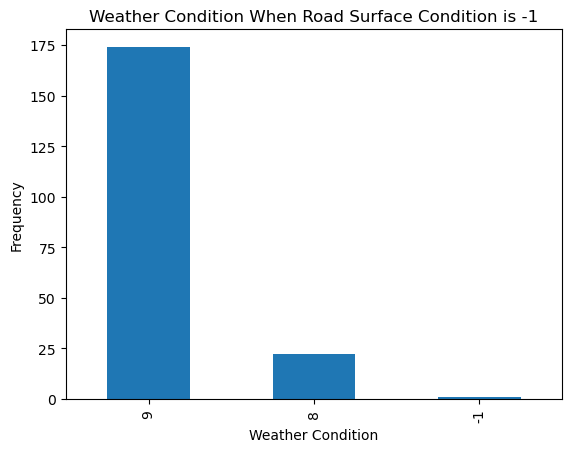

In [2121]:
# To fix the remaining -1 road condition, i will check the weather condition predominant with the remaining -1 and assign it the corresponding predominant road condition
# Checking the predominant weather condition when weather condition  is -1
frequency_1 = accident_df[accident_df['road_surface_conditions'] == -1]['weather_conditions'].value_counts()

# Plotting the frequency bar chart
frequency_1.plot(kind='bar')

# Adding labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Weather Condition When Road Surface Condition is -1')

# Display the plot
plt.show()

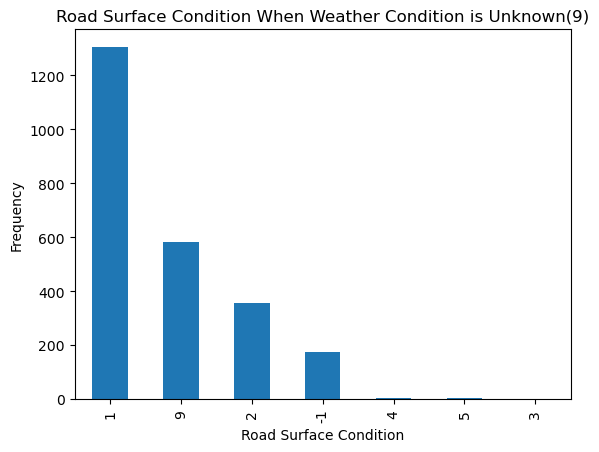

In [2122]:
# Checking the predominant road condition when weather condition  is 9
frequency_2 = accident_df[accident_df['weather_conditions'] == 9]['road_surface_conditions'].value_counts()

# Plotting the frequency bar chart
frequency_2.plot(kind='bar')

# Adding labels and title
plt.xlabel('Road Surface Condition')
plt.ylabel('Frequency')
plt.title('Road Surface Condition When Weather Condition is Unknown(9)')

# Display the plot
plt.show()

In [2123]:
# road condition = 1 account for almost half when weather is 9, soi i will make the remaing -1 in road condition = 1
# Changeing values to 1 where the value is -1
accident_df.loc[accident_df['road_surface_conditions'] == -1, 'road_surface_conditions'] = 1

In [2124]:
## we still have some rows with road surface condition as 
## This will be taking as 'unknown(self reported)'

## checking unique values again
accident_df['road_surface_conditions'].unique()

array([9, 1, 2, 5, 4, 3])

In [2125]:
## Checking the unique value of ROAD TYPE at site to ensure it matches those on the road accident statistic form
accident_df['road_type'].unique()

array([6, 2, 3, 7, 1, 9])

In [2126]:
# Checking the unique value of light conditions to ensure it matches those on the road accident statistic form

accident_df['light_conditions'].unique()

array([ 1,  4,  5,  7,  6, -1])

In [2127]:
## checking the rows with light_conditions = -1
accident_df[accident_df['light_conditions']==-1]


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,-1,-1,-1,1,-1,-1,2,-1,2,E01029085


In [2128]:
## since its just one row i will drop it. it also has -1 appearing alot in other columns
accident_df = accident_df[accident_df['light_conditions'] != -1]

accident_df['light_conditions'].unique()

array([1, 4, 5, 7, 6])

In [2129]:
# Checking the unique value of accident severity to ensure it matches those on the road accident statistic form
accident_df['accident_severity'].unique()

array([3, 2, 1])

In [2130]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2131]:
## using one-hot encoding to transform accident severity
accident_severity_df = pd.get_dummies(accident_df['accident_severity'])

## renaming the columns
accident_severity_df.rename(columns={1: 'fatal', 2: 'serious', 3: 'slight'}, inplace=True)
accident_severity_df

,fatal,serious,slight
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [2132]:
## using one-hot encoding to transform road surface conditions
road_surface_conditions_df = pd.get_dummies(accident_df['road_surface_conditions'])

## renaming the columns
road_surface_conditions_df.rename(columns={1: 'Dry', 2: 'Wet/Damp', 3: 'Snow', 4: 'Frost/Ice', 5: 'Flood', 9: 'Unknown (self reported)'}, inplace=True)
road_surface_conditions_df

,Dry,Wet/Damp,Snow,Frost/Ice,Flood,Unknown (self reported)
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
91194,1,0,0,0,0,0
91195,1,0,0,0,0,0
91196,1,0,0,0,0,0
91197,1,0,0,0,0,0


In [2133]:
## using one-hot encoding to transform road_type
road_type_df = pd.get_dummies(accident_df['road_type'])

## renaming the columns
road_type_df.rename(columns={1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown'}, inplace=True)
road_type_df



,Roundabout,One way street,Dual carriageway,Single carriageway,Slip road,Unknown
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
91194,0,0,0,1,0,0
91195,0,0,0,0,0,1
91196,0,0,0,1,0,0
91197,0,0,0,1,0,0


In [2134]:
## using one-hot encoding to transform road_type
light_conditions_df = pd.get_dummies(accident_df['light_conditions'])

## renaming the columns
light_conditions_df.rename(columns={1: 'Daylight', 4: 'Darkness: street lights present and lit', 5: 'Darkness: street lights present but unlit', 6: 'Darkness: no street lighting', 7: 'Darkness: street lighting unknown'}, inplace=True)
light_conditions_df

,Daylight,Darkness: street lights present and lit,Darkness: street lights present but unlit,Darkness: no street lighting,Darkness: street lighting unknown
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
91194,1,0,0,0,0
91195,1,0,0,0,0
91196,1,0,0,0,0
91197,1,0,0,0,0


In [2135]:
## Concatenating the three df created using one hot encoding
accident_conditions_severity = pd.concat([accident_severity_df, road_surface_conditions_df, road_type_df, light_conditions_df], axis=1)
accident_conditions_severity

,fatal,serious,slight,Dry,Wet/Damp,Snow,Frost/Ice,Flood,Unknown (self reported),Roundabout,One way street,Dual carriageway,Single carriageway,Slip road,Unknown,Daylight,Darkness: street lights present and lit,Darkness: street lights present but unlit,Darkness: no street lighting,Darkness: street lighting unknown
0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
91195,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
91196,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
91197,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [2136]:
## applying apriori algorithm to get frequent sets with support of 10% of the dataset
popular_sets = apriori(accident_conditions_severity, min_support=0.1, use_colnames=True)

##Applying rules
rules = association_rules(popular_sets, metric='lift', min_threshold=0.5)
rules.head()

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(serious),(Dry),0.201265,0.690772,0.139455,0.692890,1.003067,0.000426,1.006898,0.003828
1,(Dry),(serious),0.690772,0.201265,0.139455,0.201883,1.003067,0.000426,1.000773,0.009887
2,(serious),(Single carriageway),0.201265,0.733876,0.157207,0.781095,1.064342,0.009504,1.215707,0.075686
3,(Single carriageway),(serious),0.733876,0.201265,0.157207,0.214215,1.064342,0.009504,1.016480,0.227160
4,(Daylight),(serious),0.706792,0.201265,0.138632,0.196143,0.974550,-0.003620,0.993628,-0.081780


In [2137]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(serious),(Dry),0.201265,0.690772,0.139455,0.692890,1.003067,0.000426,1.006898,0.003828
1,(Dry),(serious),0.690772,0.201265,0.139455,0.201883,1.003067,0.000426,1.000773,0.009887
2,(serious),(Single carriageway),0.201265,0.733876,0.157207,0.781095,1.064342,0.009504,1.215707,0.075686
3,(Single carriageway),(serious),0.733876,0.201265,0.157207,0.214215,1.064342,0.009504,1.016480,0.227160
4,(Daylight),(serious),0.706792,0.201265,0.138632,0.196143,0.974550,-0.003620,0.993628,-0.081780
...,...,...,...,...,...,...,...,...,...,...
107,"(slight, Dry)","(Daylight, Single carriageway)",0.541152,0.525209,0.310807,0.574343,1.093553,0.026589,1.115433,0.186443
108,(Single carriageway),"(Daylight, slight, Dry)",0.733876,0.422904,0.310807,0.423515,1.001444,0.000448,1.001060,0.005419
109,(Daylight),"(slight, Single carriageway, Dry)",0.706792,0.393693,0.310807,0.439744,1.116972,0.032548,1.082196,0.357159
110,(slight),"(Daylight, Single carriageway, Dry)",0.783493,0.401259,0.310807,0.396694,0.988625,-0.003576,0.992434,-0.050463


In [2138]:
## filtering the data to show just rows with consequent accident severity
severity_rules = rules[rules['consequents'].apply(lambda x: 'fatal' in x or 'slight' in x or 'serious' in x)]

severity_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Dry),(serious),0.690772,0.201265,0.139455,0.201883,1.003067,0.000426,1.000773,0.009887
3,(Single carriageway),(serious),0.733876,0.201265,0.157207,0.214215,1.064342,0.009504,1.016480,0.227160
4,(Daylight),(serious),0.706792,0.201265,0.138632,0.196143,0.974550,-0.003620,0.993628,-0.081780
7,(Dry),(slight),0.690772,0.783493,0.541152,0.783402,0.999884,-0.000063,0.999581,-0.000374
8,(Wet/Damp),(slight),0.287890,0.783493,0.224479,0.779737,0.995206,-0.001081,0.982948,-0.006719
10,(Dual carriageway),(slight),0.144806,0.783493,0.114871,0.793276,1.012486,0.001417,1.047323,0.014420
12,(Single carriageway),(slight),0.733876,0.783493,0.564837,0.769663,0.982348,-0.010150,0.939957,-0.063251
14,(Daylight),(slight),0.706792,0.783493,0.559343,0.791384,1.010071,0.005577,1.037823,0.034005
16,(Darkness: street lights present and lit),(slight),0.208623,0.783493,0.162076,0.776884,0.991565,-0.001379,0.970380,-0.010635
34,"(Single carriageway, Dry)",(serious),0.510834,0.201265,0.109246,0.213858,1.062567,0.006433,1.016018,0.120374


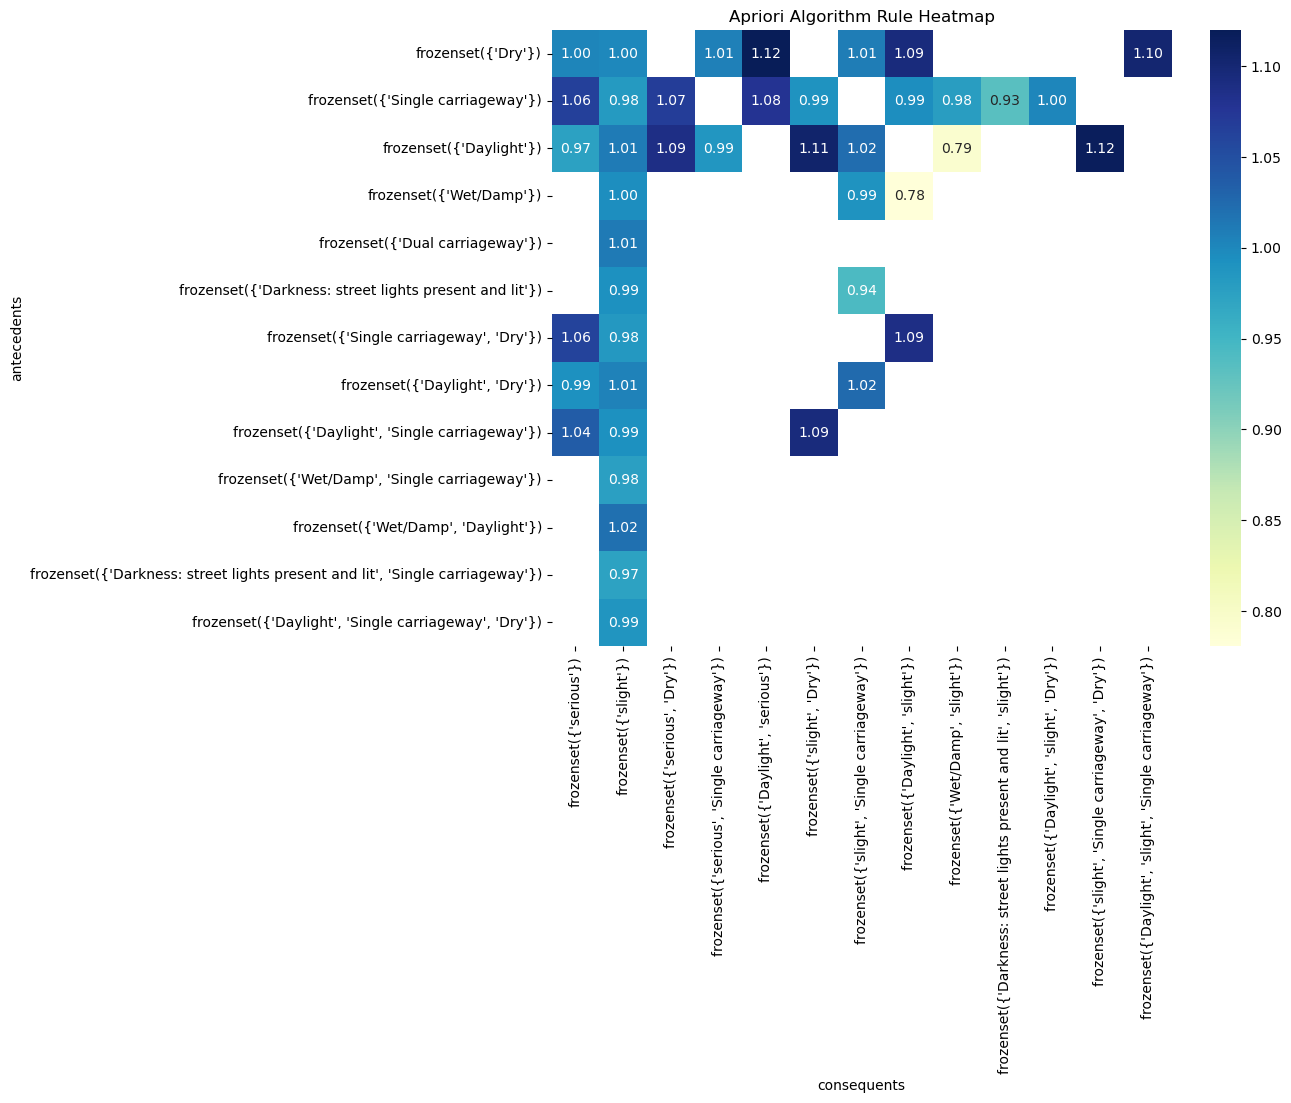

In [2139]:
import seaborn as sns

# Pivot ttp create matrix
pivot_data = severity_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Apriori Algorithm Rule Heatmap")
plt.show()

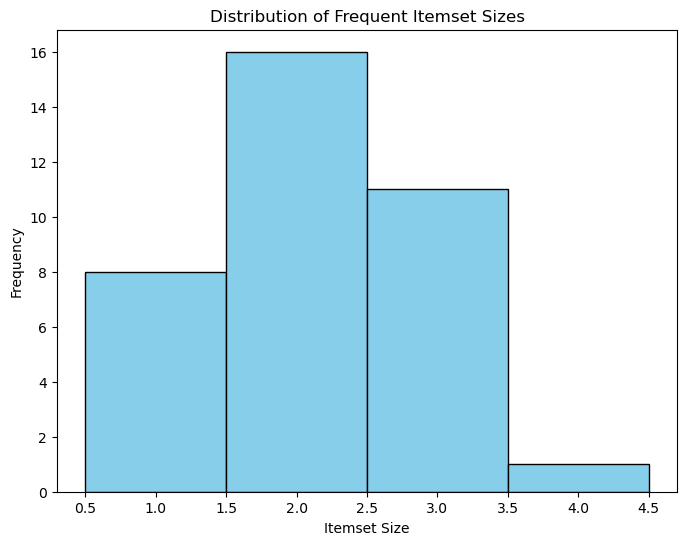

In [2140]:
# Calculating size of itemset using lambda
popular_sets['Size'] = popular_sets['itemsets'].apply(lambda x: len(x))

plt.figure(figsize=(8, 6))

num_bins = np.arange(min(popular_sets['Size']) - 0.5, max(popular_sets['Size']) + 1.5, 1)
plt.hist(popular_sets['Size'], bins=num_bins, color='skyblue', edgecolor='black')


plt.xlabel('Itemset Size')
plt.ylabel('Frequency')
plt.title('Distribution of Frequent Itemset Sizes')

plt.show()

In [2141]:
popular_sets

,support,itemsets,Size
0,0.201265,(serious),1
1,0.783493,(slight),1
2,0.690772,(Dry),1
3,0.287890,(Wet/Damp),1
4,0.144806,(Dual carriageway),1
5,0.733876,(Single carriageway),1
6,0.706792,(Daylight),1
7,0.208623,(Darkness: street lights present and lit),1
8,0.139455,"(serious, Dry)",2
9,0.157207,"(serious, Single carriageway)",2


## Running clustering on our region : Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc

In [2142]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [2143]:
## I will filter by police force Humberside (this covers he Humberside Police area covers four local authorities – both urban and rural – Kingston upon Hull, East Riding of Yorkshire, North Lincolnshire and North East Lincolnshire) https://www.humberside-pcc.gov.uk/Our-Work/PCC-Election-2021/Police-and-Crime-Landscape.aspx

# Filter rows where Column2 is 'Humberside' and select relevant features for analysis
#our_region = accident_df[accident_df['police_force'] == 16][['accident_severity', 'road_surface_conditions', 'road_type', 'light_conditions']]
#our_region
our_region = accident_df[accident_df['police_force'] == 16][['longitude', 'latitude', 'accident_severity']]
our_region

,longitude,latitude,accident_severity
37750,-0.331047,53.747751,2
37751,-0.393424,53.744936,3
37752,-0.528743,53.512895,3
37753,-0.324858,53.791630,2
37754,-0.095008,53.574501,3
...,...,...,...
39454,-0.651104,53.566753,3
39455,-0.424674,53.839482,3
39456,-0.308880,53.782750,3
39457,-0.703181,53.569801,3


#### Data preprocessing

In [2144]:

# checking for null values
our_region.isna().sum()

longitude            0
latitude             0
accident_severity    0
dtype: int64

In [2145]:
our_region.describe()

,longitude,latitude,accident_severity
count,1709.000000,1709.000000,1709.000000
mean,-0.381991,53.719078,2.770041
std,0.219710,0.135850,0.463306
min,-1.055770,53.456614,1.000000
25%,-0.477732,53.583015,3.000000
50%,-0.358555,53.743329,3.000000
75%,-0.250808,53.773967,3.000000
max,0.123813,54.143923,3.000000


In [2146]:
our_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1709 entries, 37750 to 39458
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   longitude          1709 non-null   float64
 1   latitude           1709 non-null   float64
 2   accident_severity  1709 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 53.4 KB


In [2147]:
# from the above the data has different scale of units so i will use standard scalar to standadize or normalize the data

#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans

#scaler = StandardScaler()

# ADDING t to show the transformed columns
#our_region[['accident_severity_T', 'road_surface_conditions_T', 'road_type_T', 'light_conditions_T']] = scaler.fit_transform(our_region[['accident_severity', 'road_surface_conditions', 'road_type', 'light_conditions']])
#our_region

In [2148]:
our_region.describe()

,longitude,latitude,accident_severity
count,1709.000000,1709.000000,1709.000000
mean,-0.381991,53.719078,2.770041
std,0.219710,0.135850,0.463306
min,-1.055770,53.456614,1.000000
25%,-0.477732,53.583015,3.000000
50%,-0.358555,53.743329,3.000000
75%,-0.250808,53.773967,3.000000
max,0.123813,54.143923,3.000000


Next I will find the best number for k using the elbow method and using a function found here reference: https://youtu.be/iNlZ3IU5Ffw?t=523

In [2149]:
def best_kmeans(data, maximum_k):
    means = []
    inertias = []
    for k in range(1, maximum_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
        ## generating the elbow plot
        fig = plt.subplots(figsize=(20,10))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('n_clusters')
        plt.ylabel('inertias')
        plt.grid(True)
        plt.show()

In [2150]:
## applying the function
#best_kmeans(our_region[['accident_severity_T', 'road_surface_conditions_T', 'road_type_T', 'light_conditions_T']], 15)

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



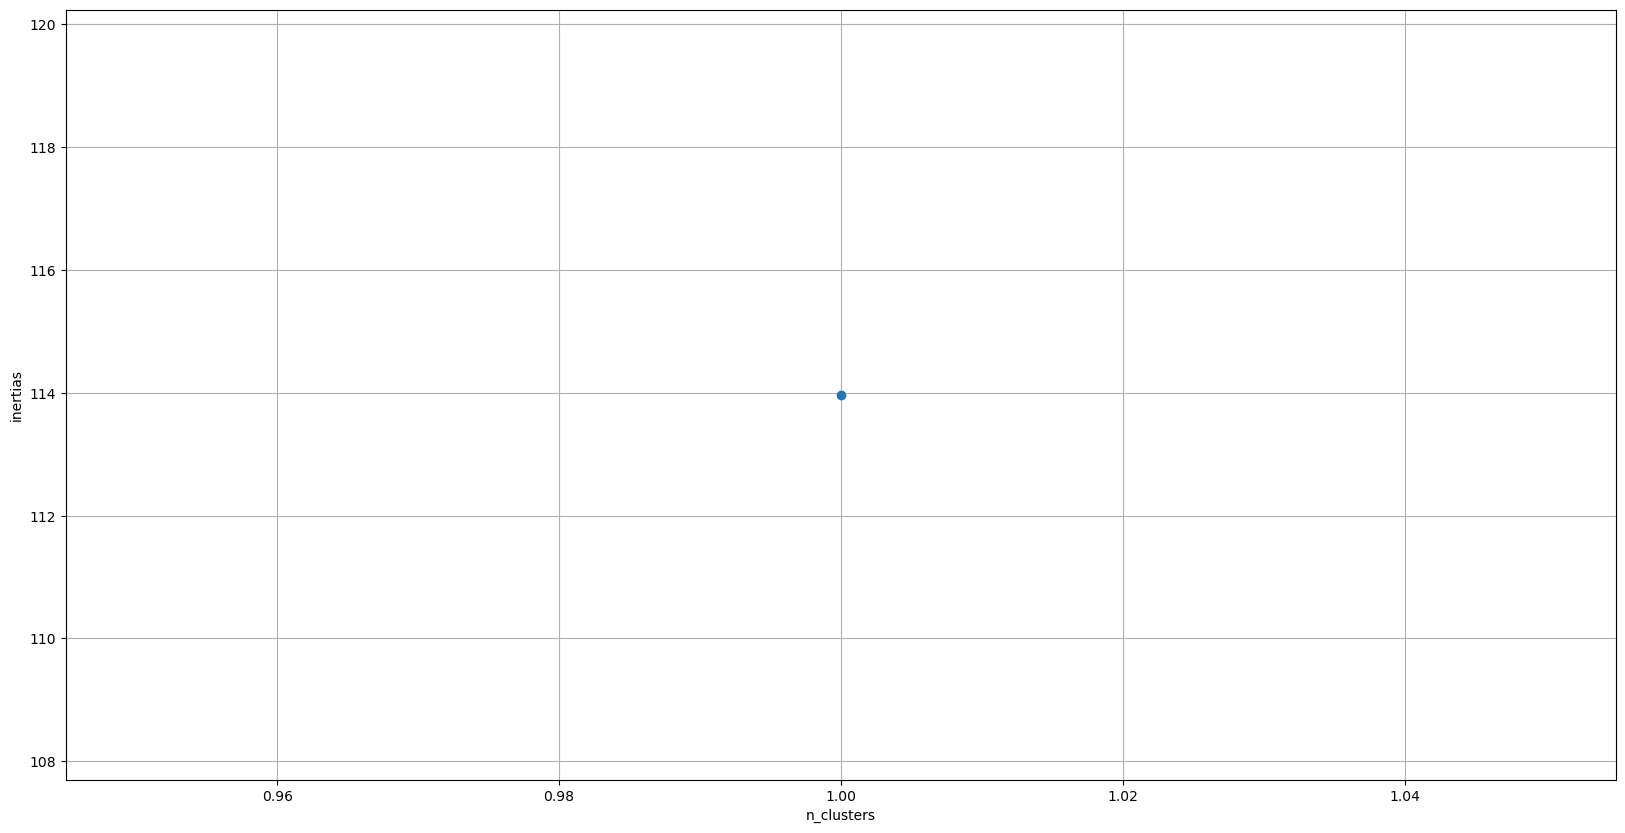

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



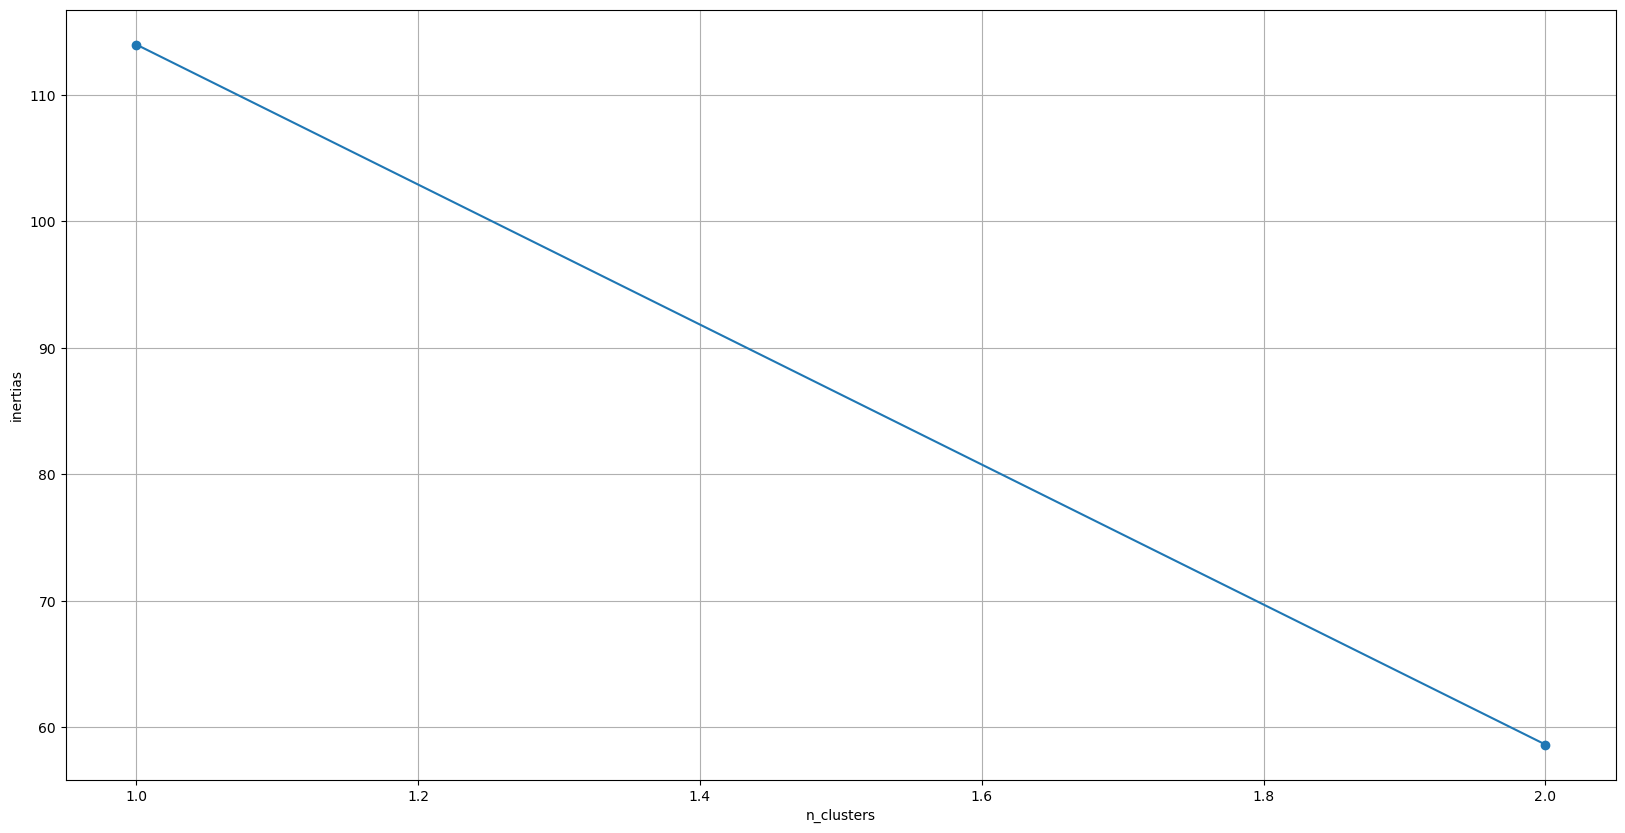

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



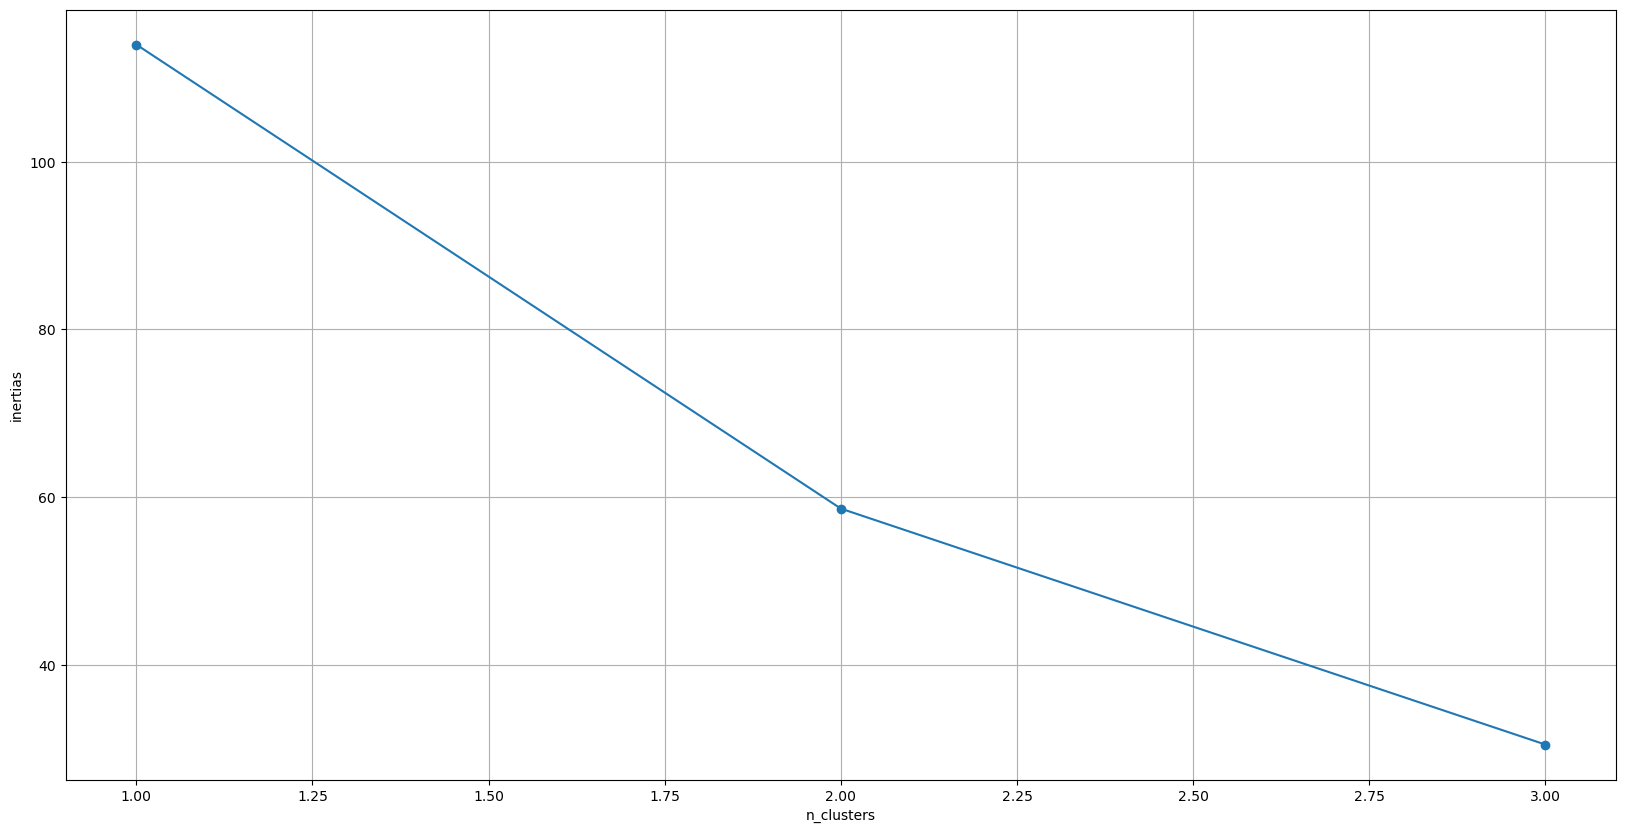

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



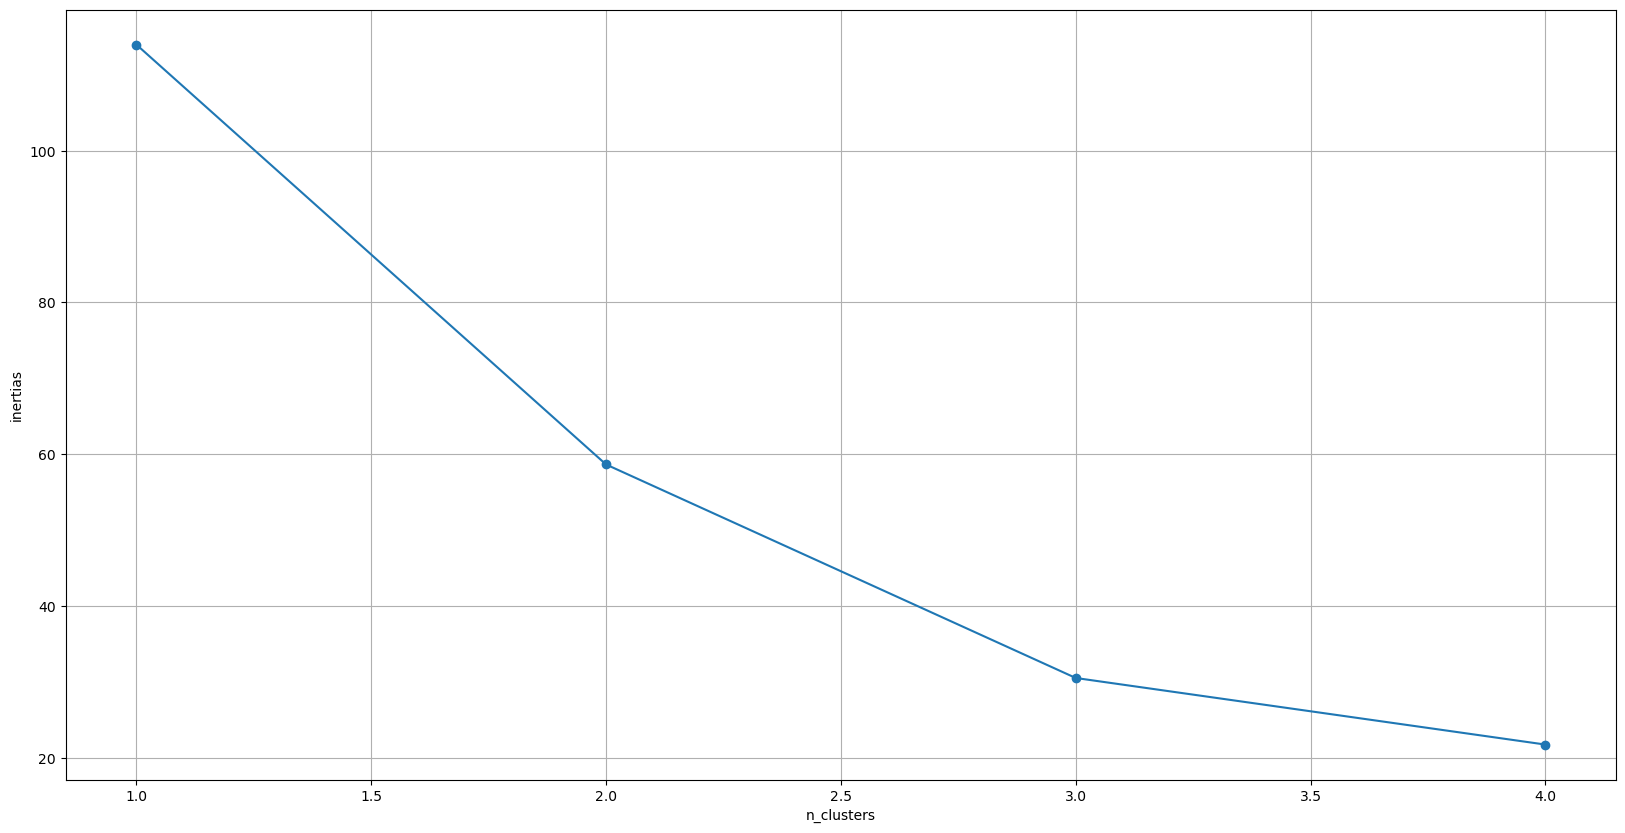

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



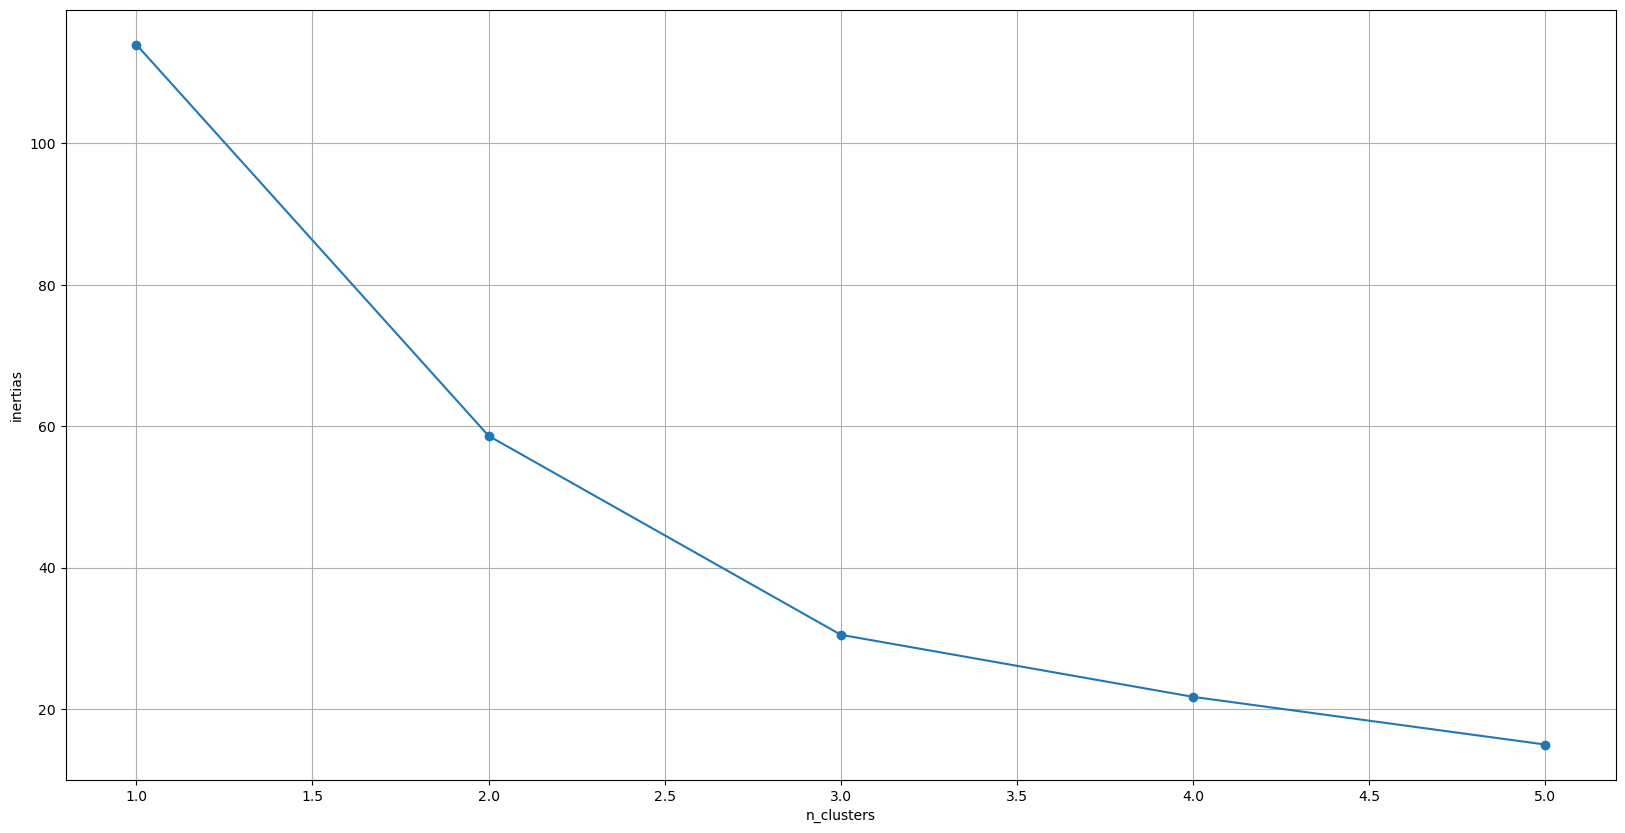

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



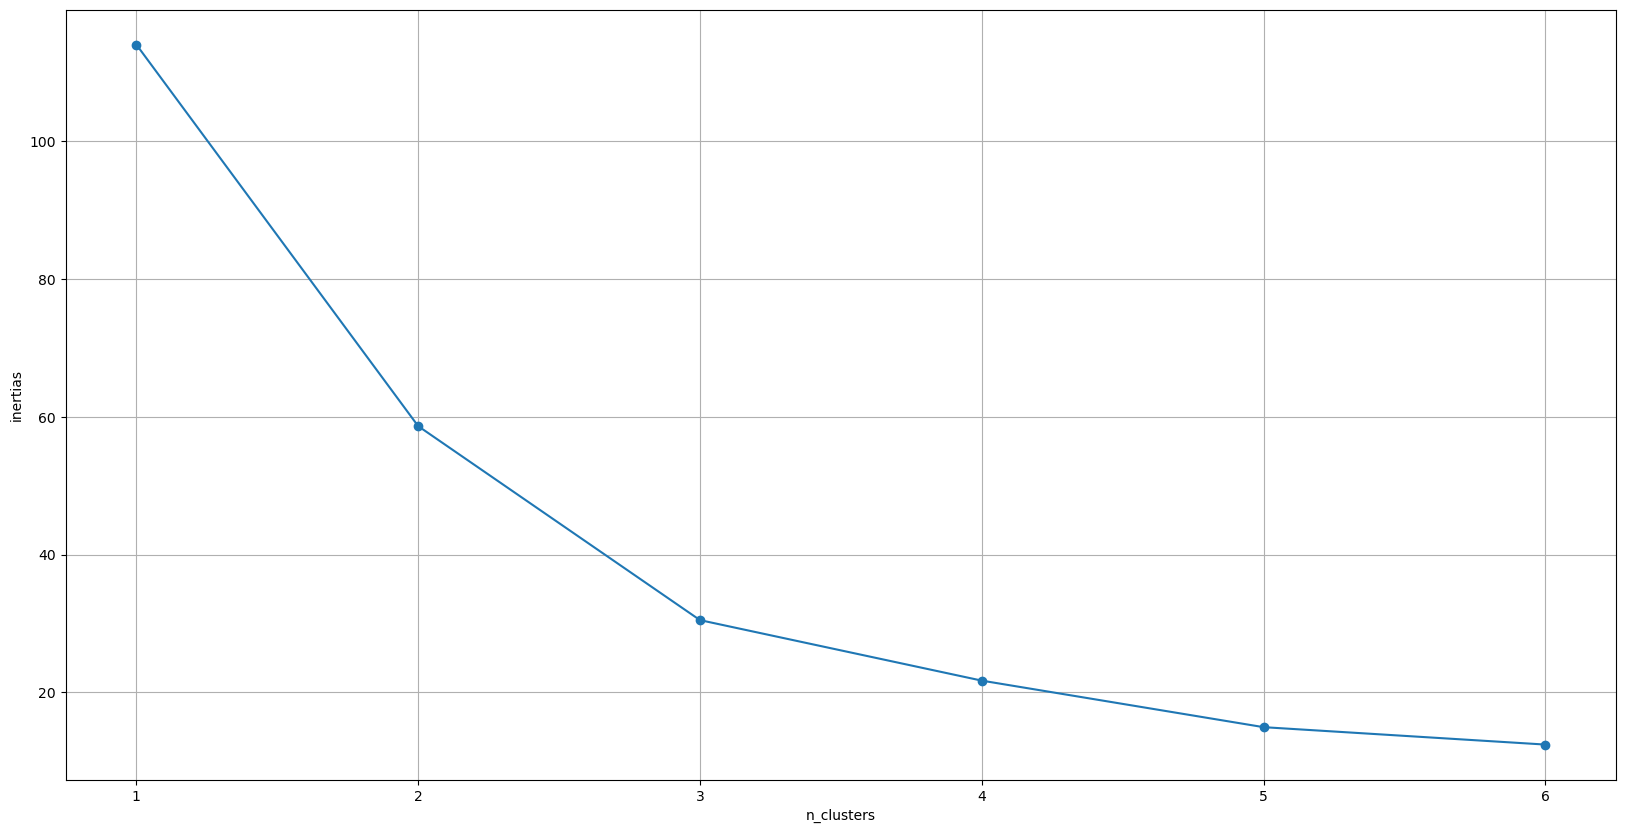

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



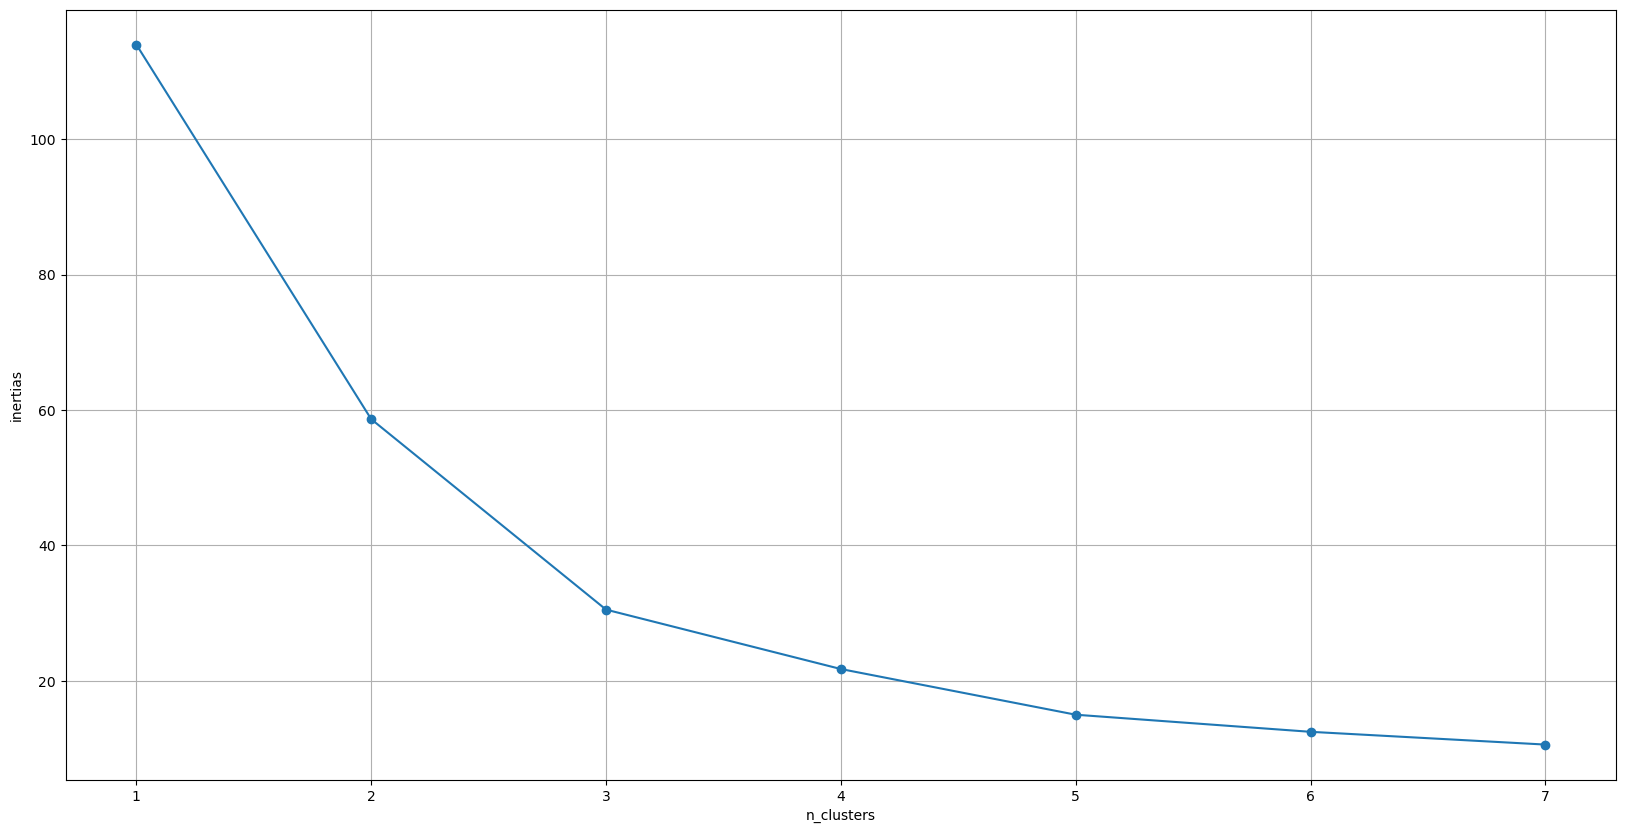

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



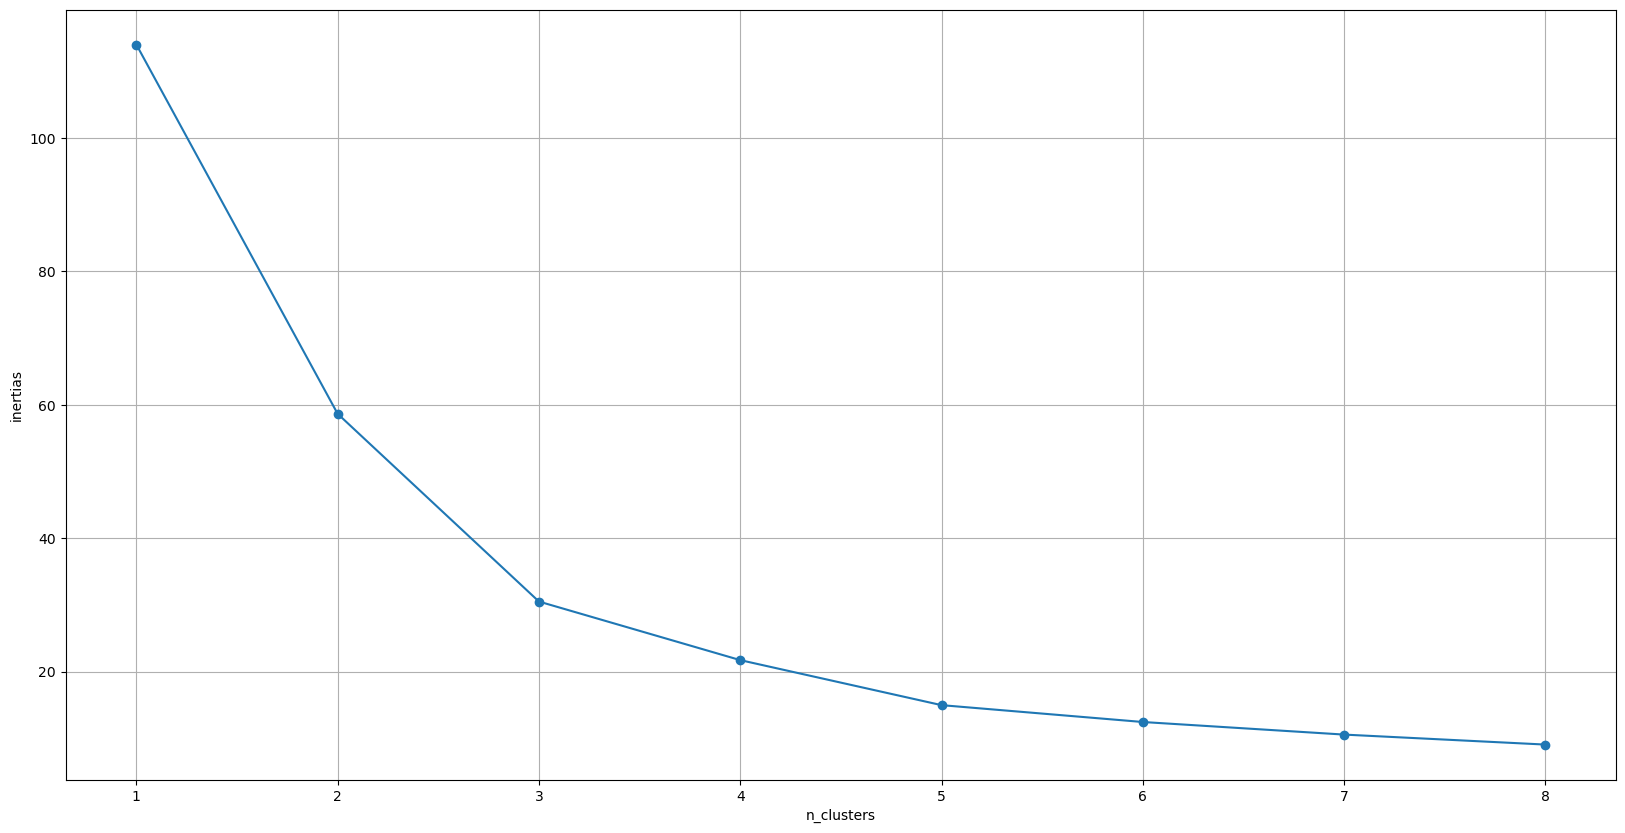

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



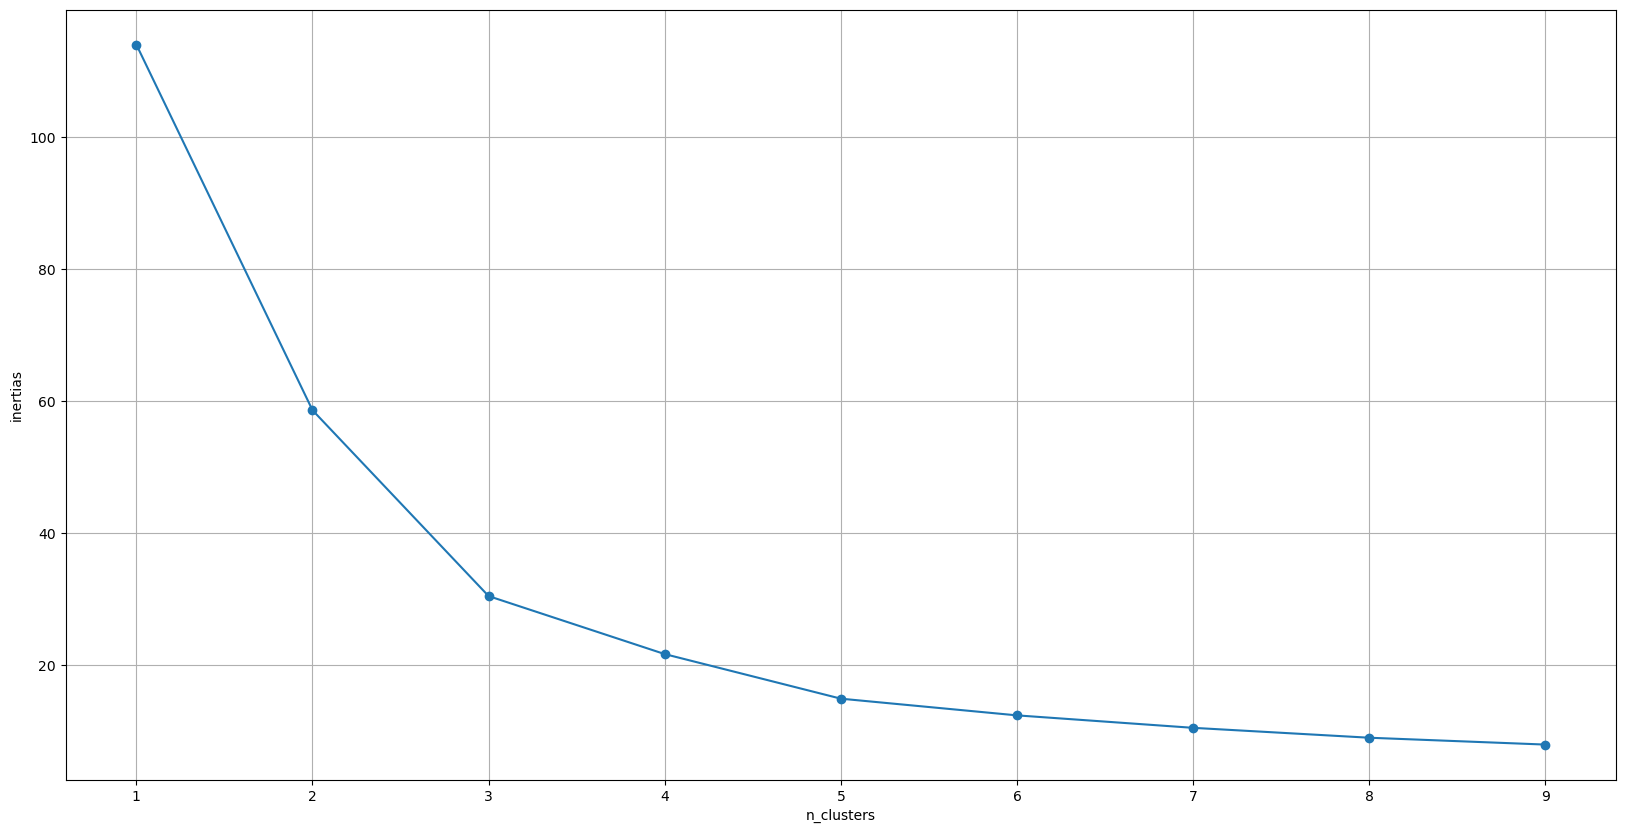

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



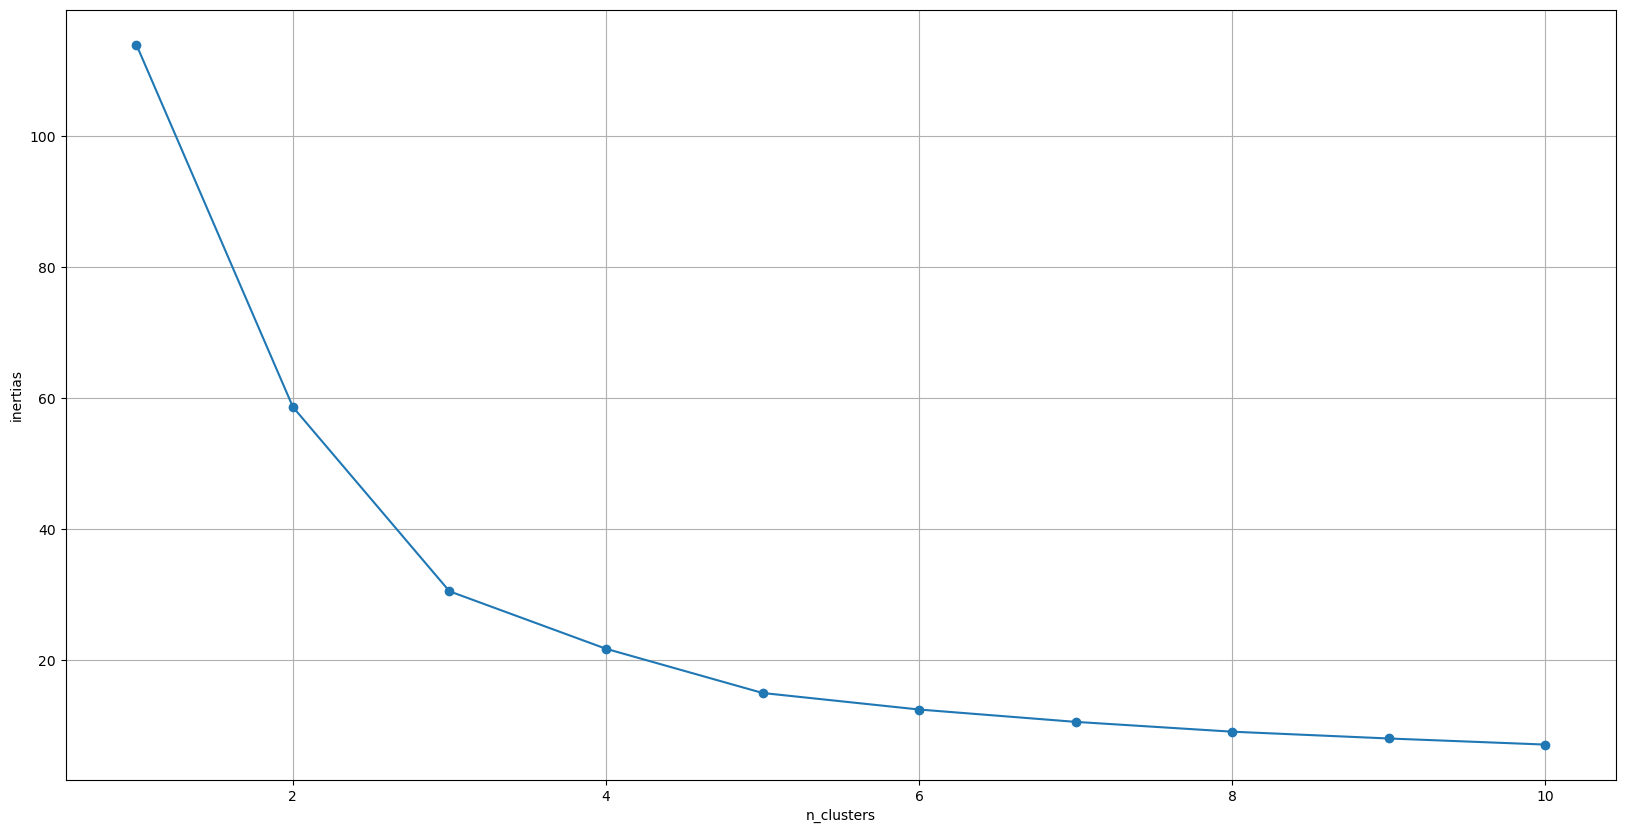

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



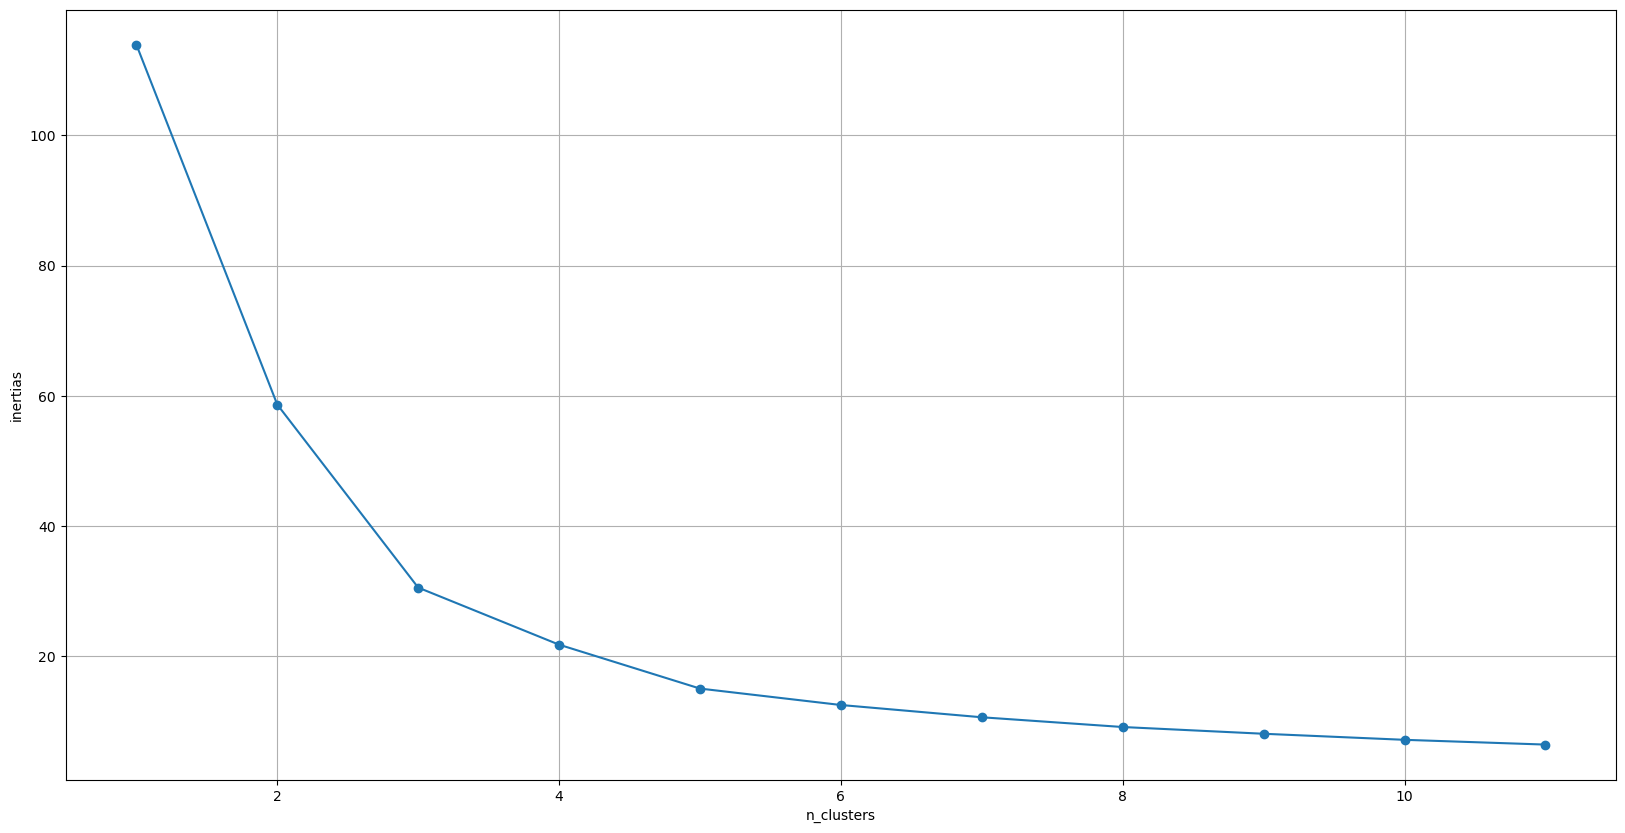

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



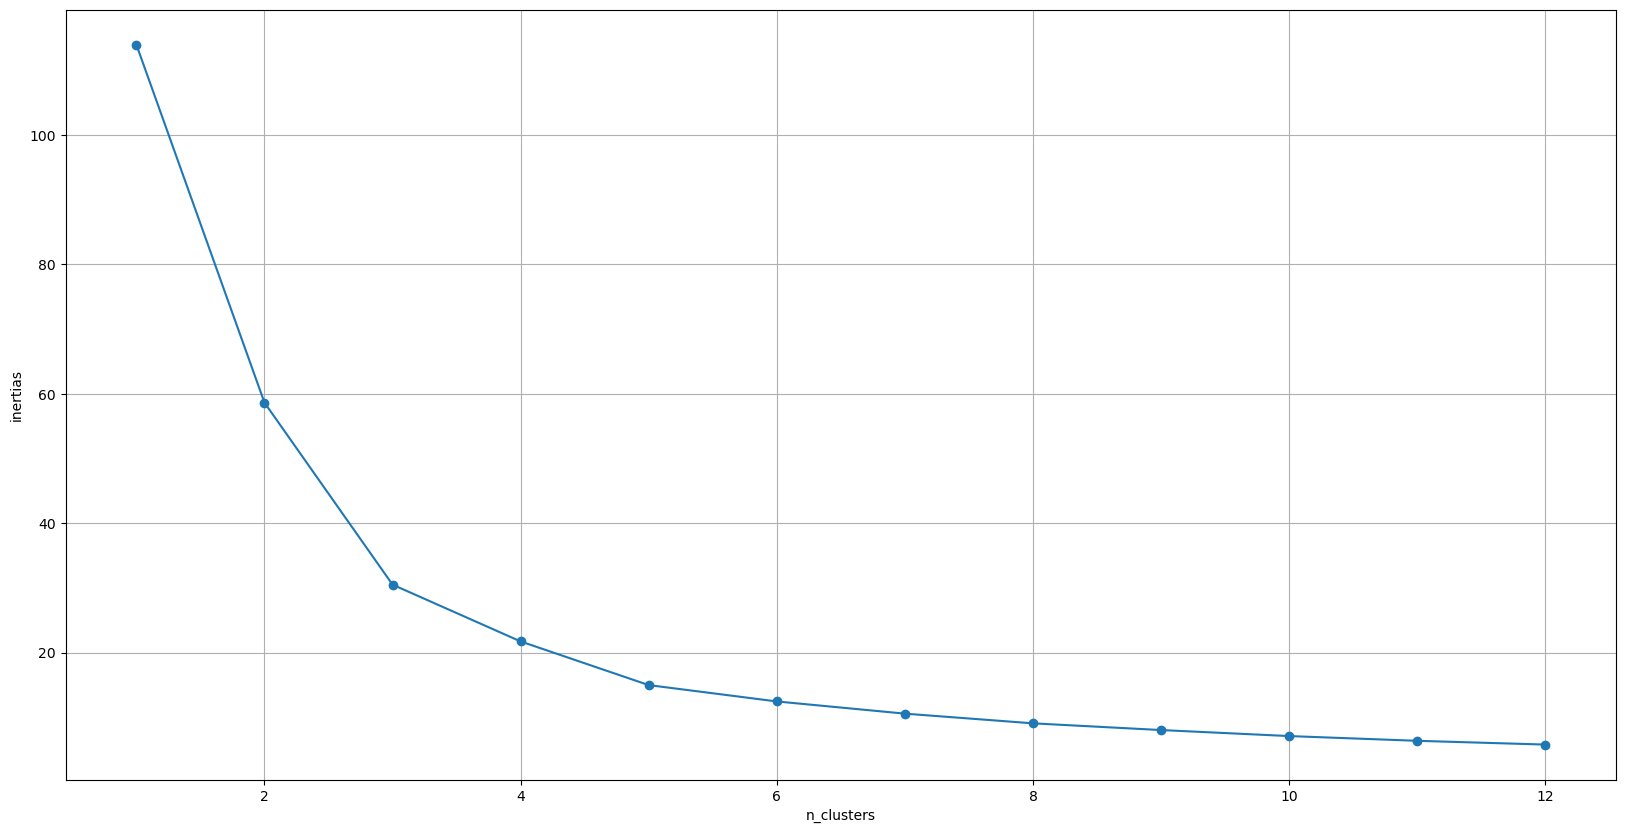

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



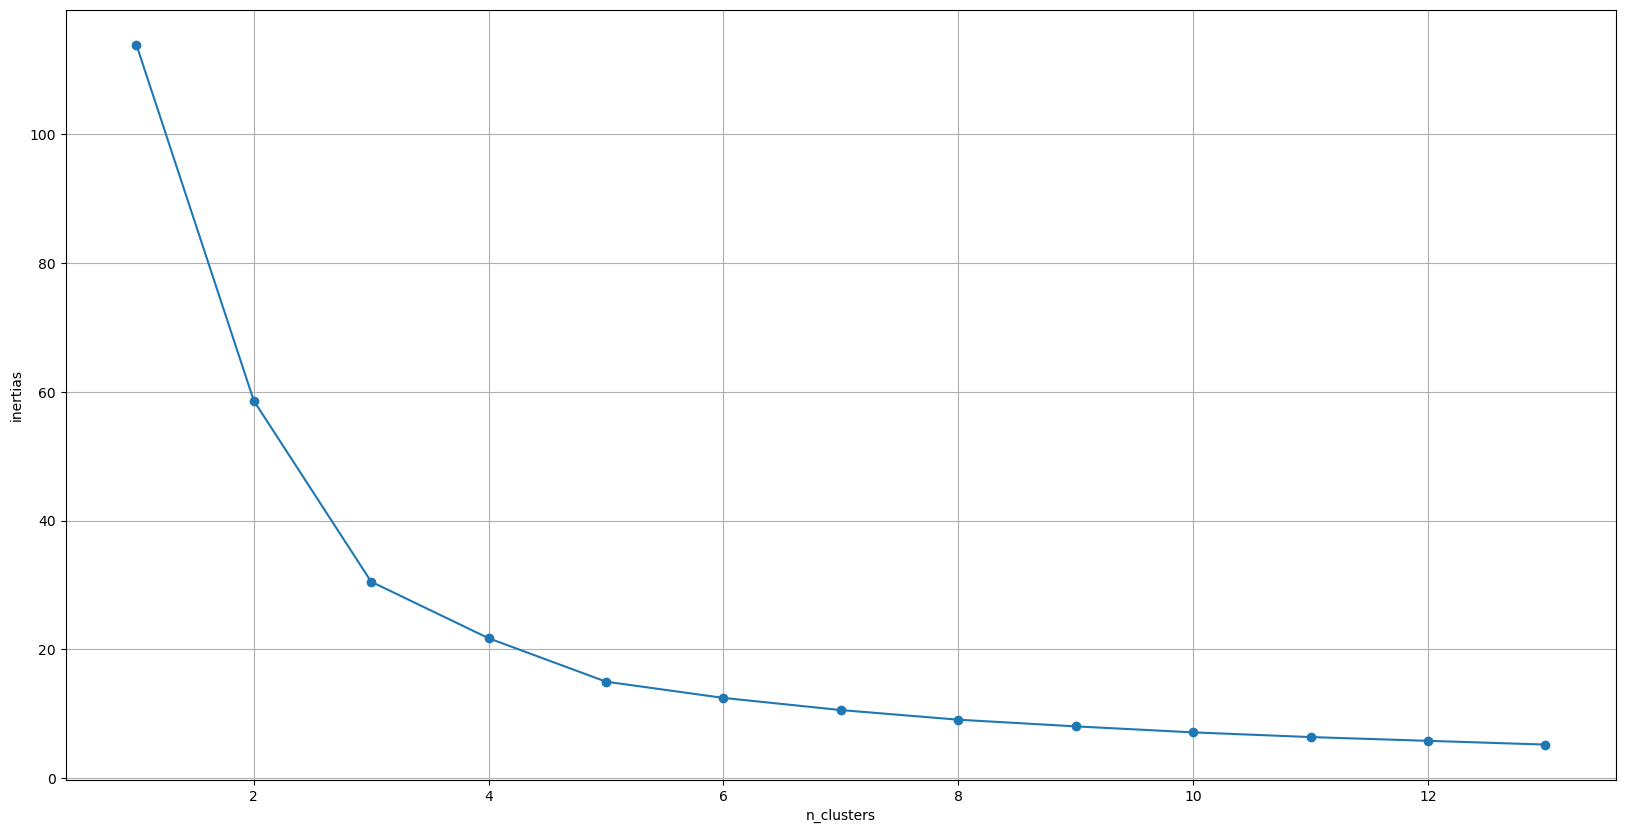

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



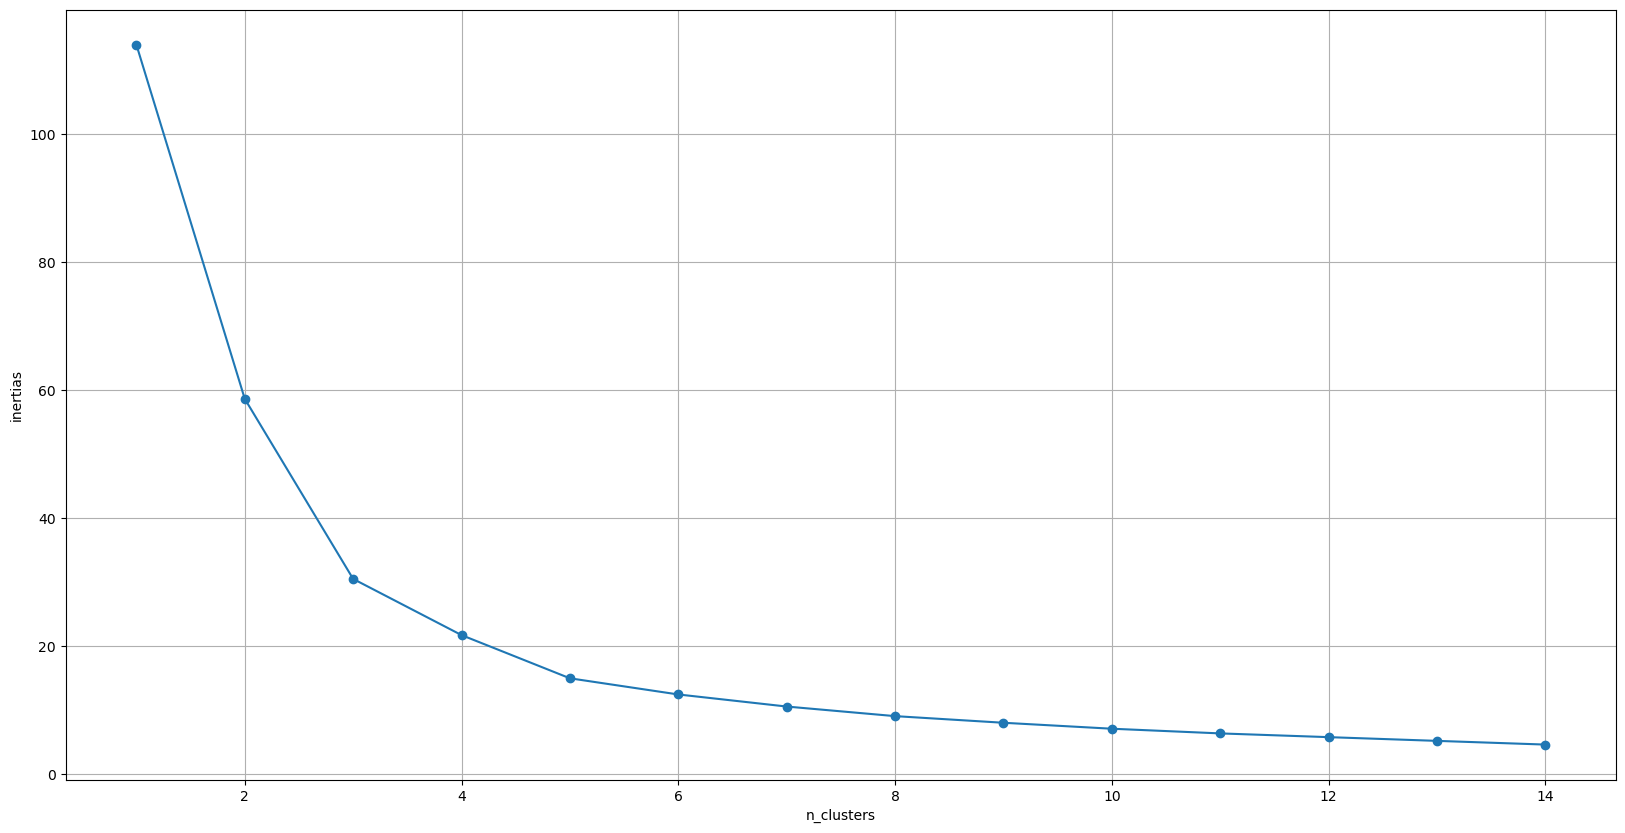

In [2151]:
#best_kmeans(our_region[['accident_severity', 'road_surface_conditions', 'road_type', 'light_conditions']], 15)
best_kmeans(our_region[['longitude', 'latitude']], 15)

### from the above the elbow point is at the 3 to 4 so i will choose 4

In [2152]:
## applying kmeans clustering
#kmeans = KMeans(n_clusters = 4)
#kmeans.fit(our_region[['accident_severity_T', 'road_surface_conditions_T', 'road_type_T', 'light_conditions_T']])

In [2153]:
#kmeans = KMeans(n_clusters = 4)
#kmeans.fit(our_region[['accident_severity', 'road_surface_conditions', 'road_type', 'light_conditions']])
kmeans = KMeans(n_clusters = 4)
kmeans.fit(our_region[['longitude', 'latitude']])

/Users/Yuwa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [2154]:
our_region['k_means=4'] =kmeans.labels_
our_region

,longitude,latitude,accident_severity,k_means=4
37750,-0.331047,53.747751,2,1
37751,-0.393424,53.744936,3,1
37752,-0.528743,53.512895,3,2
37753,-0.324858,53.791630,2,1
37754,-0.095008,53.574501,3,0
...,...,...,...,...
39454,-0.651104,53.566753,3,2
39455,-0.424674,53.839482,3,1
39456,-0.308880,53.782750,3,1
39457,-0.703181,53.569801,3,2


#### Ploting the clusters

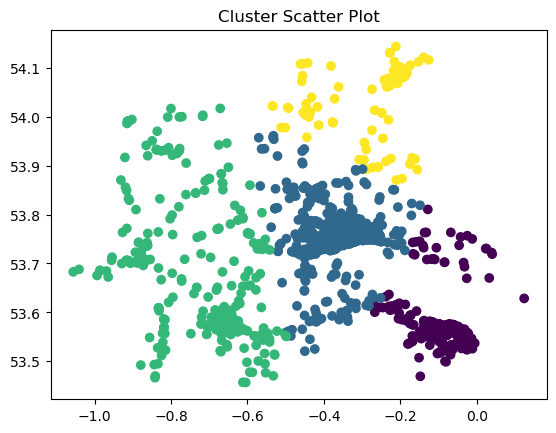

In [2155]:
plt.scatter(y=our_region['latitude'], x=our_region['longitude'], c=our_region['k_means=4'])

plt.title('Cluster Scatter Plot')
figsize=(10,5)
plt.show()

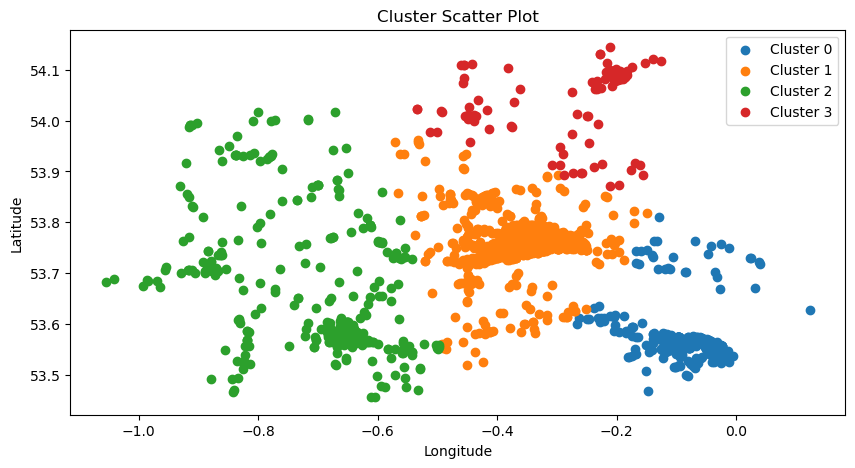

In [2156]:
# Assign numbers to clusters
cluster_mapping = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}  # You can expand this mapping for more clusters

our_region['cluster_number'] = our_region['k_means=4'].map(cluster_mapping)

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 5))
for cluster_name, cluster_group in our_region.groupby('cluster_number'):
    plt.scatter(y=cluster_group['latitude'], x=cluster_group['longitude'], label=cluster_name)

plt.title('Cluster Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [2157]:
our_region['k_means=4'].unique()

array([1, 2, 0, 3], dtype=int32)

In [2158]:
import folium

# Create a map centered at a specific location
map_center = [our_region['latitude'].mean(), our_region['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define colors for clusters
cluster_colors = ['red', 'blue', 'green', 'purple']

# Add markers to the map for each data point
for index, row in our_region.iterrows():
    cluster_index = cluster_index = int(row['k_means=4'])  # Assuming 'cluster' holds the cluster assignment
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=cluster_colors[cluster_index],
        fill=True,
        fill_color=cluster_colors[cluster_index],
        fill_opacity=0.7
    ).add_to(m)

# Save the map to an HTML file
m.save('cluster_map.html')


In [2159]:
our_region['accident_severity'] = accident_df[accident_df['police_force'] == 16][['accident_severity']]
our_region.head()

,longitude,latitude,accident_severity,k_means=4,cluster_number
37750,-0.331047,53.747751,2,1,Cluster 1
37751,-0.393424,53.744936,3,1,Cluster 1
37752,-0.528743,53.512895,3,2,Cluster 2
37753,-0.324858,53.791630,2,1,Cluster 1
37754,-0.095008,53.574501,3,0,Cluster 0


<Figure size 1000x600 with 0 Axes>

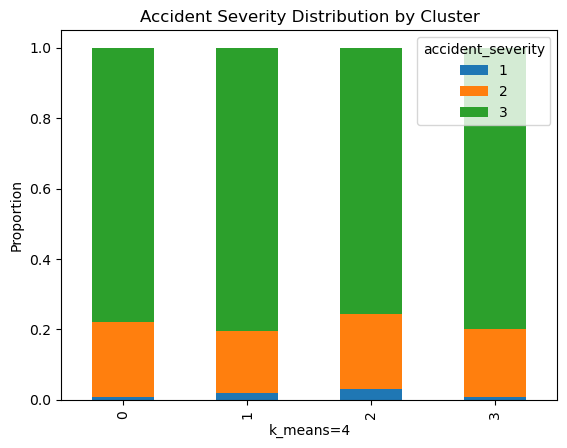

In [2160]:
# Calculating accident severity statistics per cluster
severity_stats = our_region.groupby('k_means=4')['accident_severity'].value_counts(normalize=True).unstack()

# Creating a box plot to visualize severity distribution across clusters
plt.figure(figsize=(10, 6))
severity_stats.plot(kind='bar', stacked=True)
plt.title('Accident Severity Distribution by Cluster')
plt.xlabel('k_means=4')
plt.ylabel('Proportion')
plt.legend(title='accident_severity')
plt.show()

Filtering on severity 1 which is fatal to see where in our region fatal accident occurs more

In [2161]:


# Filter the data to show only accidents with severity 3
filtered_data = our_region[our_region['accident_severity'] == 1]

# Create a map centered at a specific location
map_center = [filtered_data['latitude'].mean(), filtered_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define colors for clusters
cluster_colors = ['red', 'blue', 'green', 'purple']

# Add markers to the map for each data point
for index, row in filtered_data.iterrows():
    cluster_index = int(row['k_means=4'])  # Assuming 'cluster' holds the cluster assignment
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=cluster_colors[cluster_index],
        fill=True,
        fill_color=cluster_colors[cluster_index],
        fill_opacity=0.7
    ).add_to(m)

# Save the map to an HTML file
m.save('cluster_map_severity_3.html')


## Using outlier detection methods, identify unusual entries in your data set.

In [2162]:
from numpy import quantile, where
from sklearn.neighbors import LocalOutlierFactor

In [2163]:
our_region1 = accident_df[accident_df['police_force'] == 16][['longitude', 'latitude', 'accident_severity']]

In [2164]:
# initializing the model
model = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
y_pred = model.fit_predict(our_region1)
LOF_Scores = model.negative_outlier_factor_
LOF_pred = pd.Series(y_pred, index=our_region1.index).replace({-1: 1, 1: 0})

# getting the outliers
LOF_anomalies = our_region1[LOF_pred == 1]

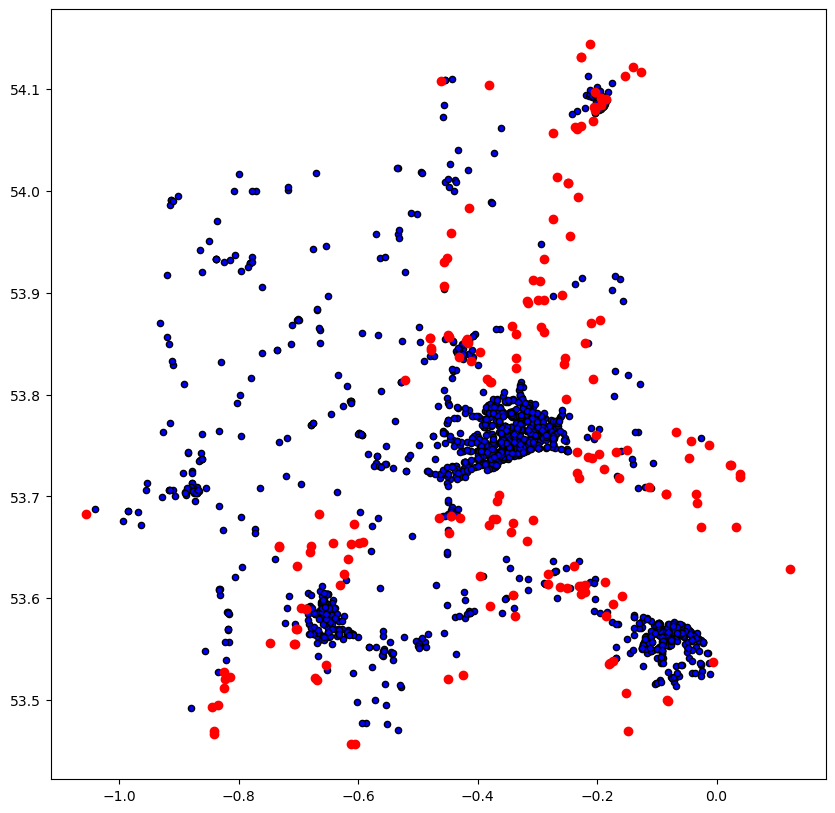

In [2165]:
# Plotting the scatter plot
plt.figure(figsize=(10,10))
plt.scatter(our_region1['longitude'], our_region1['latitude'], c='blue', s=20, edgecolor='k')
plt.scatter(LOF_anomalies['longitude'], LOF_anomalies['latitude'], c='red')

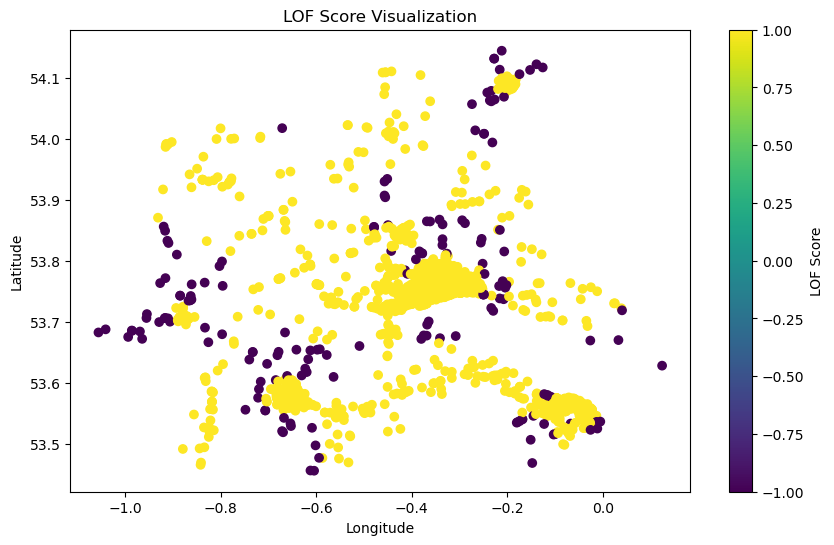

In [2166]:
# visualizing lof score with latitude and longitude
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_scores = lof_model.fit_predict(our_region1[['longitude', 'latitude']])  


plt.figure(figsize=(10, 6))
plt.scatter(our_region1['longitude'], our_region1['latitude'], c=lof_scores, cmap='viridis')
plt.colorbar(label='LOF Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LOF Score Visualization')
plt.show()


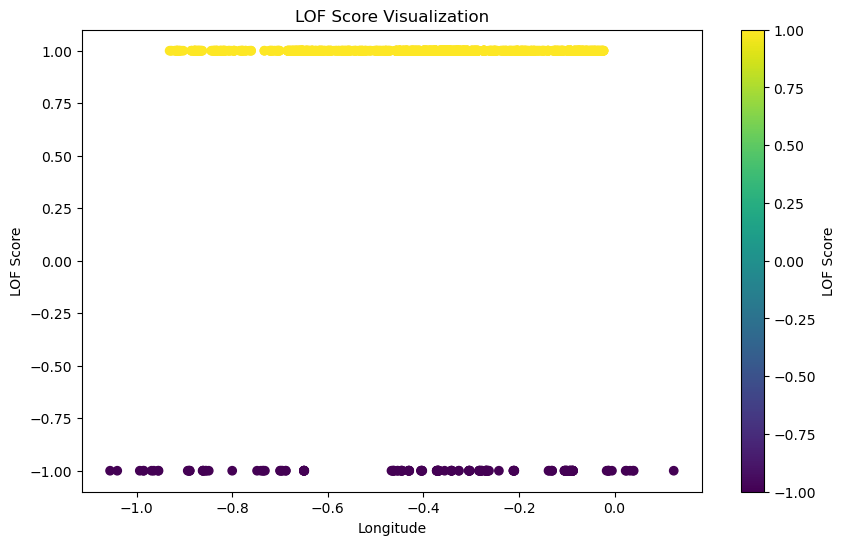

In [2167]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_scores = lof_model.fit_predict(our_region1[['longitude']])  

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(our_region1['longitude'], lof_scores, c=lof_scores, cmap='viridis')
plt.colorbar(label='LOF Score')
plt.xlabel('Longitude')
plt.ylabel('LOF Score')
plt.title('LOF Score Visualization')
plt.show()


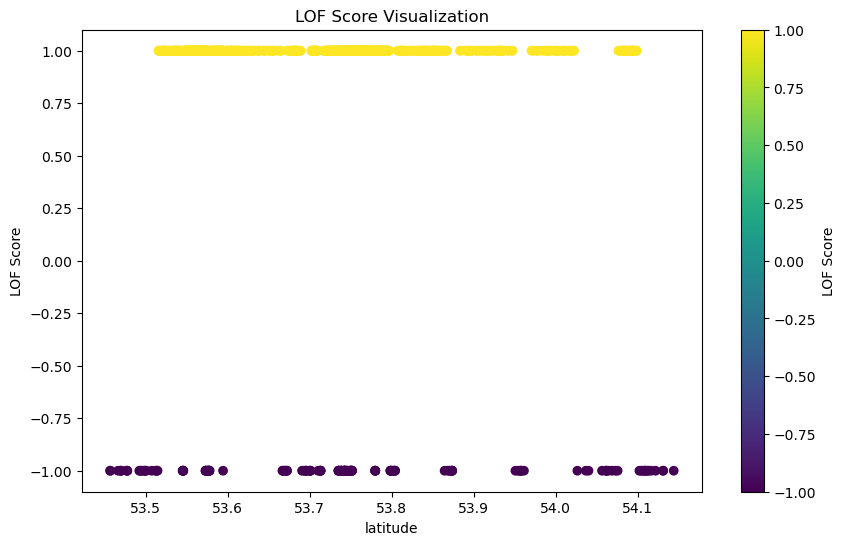

In [2168]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_scores = lof_model.fit_predict(our_region1[['latitude']])  

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(our_region1['latitude'], lof_scores, c=lof_scores, cmap='viridis')
plt.colorbar(label='LOF Score')
plt.xlabel('latitude')
plt.ylabel('LOF Score')
plt.title('LOF Score Visualization')
plt.show()

In [2169]:
outliers_longitude = LOF_anomalies['longitude'].values
outliers_longitude

array([-0.335628, -0.233784, -0.288715, -0.364669, -0.367902,  0.023263,
       -0.194271, -0.162525, -0.612097, -0.641537, -0.211803, -0.457082,
       -0.706542, -0.479137, -0.834156, -0.375015, -0.207788, -0.216042,
       -0.230815, -0.378099, -0.457088, -0.671458, -0.604488, -0.307901,
       -0.461028, -0.178702, -0.447928, -0.841138, -0.250391, -0.814399,
       -0.080638, -0.202758, -0.335979, -0.201936, -0.068088, -0.378523,
       -0.042547, -0.231345, -0.034691, -0.824837, -0.384086, -0.592563,
       -0.415732, -0.451379, -0.824069, -0.251754, -0.227102, -0.444813,
       -0.340991, -0.308108, -0.084247, -0.844064, -0.447696, -0.396412,
       -0.219488, -0.167672, -0.419228, -0.688039, -0.236704, -0.220693,
       -0.33705 , -0.423887, -0.450066, -0.669406, -0.288228, -0.29521 ,
       -0.478518, -0.842051,  0.025   , -0.732938,  0.038581, -0.340099,
       -0.1494  , -0.274044, -0.01205 , -0.702865, -0.429659, -0.748155,
       -0.180353, -0.084824, -0.267194, -0.233667, 

In [2170]:
outliers_latitude = LOF_anomalies['latitude'].values
outliers_latitude

array([53.859763, 53.722959, 53.861674, 53.700887, 53.695609, 53.730483,
       54.091148, 53.717887, 53.456973, 53.65471 , 54.143923, 53.929864,
       53.555167, 53.855636, 53.494923, 53.67806 , 53.737261, 53.738562,
       53.611582, 53.812111, 53.906988, 53.52146 , 53.456614, 53.912672,
       54.108175, 53.536116, 53.664113, 53.469956, 53.610494, 53.522828,
       53.498902, 54.096794, 53.82597 , 53.760339, 53.763615, 53.812539,
       53.754301, 53.993774, 53.701926, 53.511928, 53.815598, 53.655402,
       53.850906, 53.934168, 53.527705, 53.795432, 53.604587, 53.958353,
       53.673549, 53.676972, 53.702575, 53.493095, 53.856438, 53.841678,
       53.85105 , 53.743127, 53.852929, 53.589681, 54.062636, 53.606029,
       53.582082, 53.524997, 53.520701, 53.519541, 53.892967, 53.911755,
       53.845462, 53.466271, 53.73066 , 53.650902, 53.722447, 53.603366,
       53.745525, 54.05649 , 53.750276, 53.631506, 53.678392, 53.556419,
       53.535278, 53.70254 , 54.01364 , 54.061117, 

## classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents

In [2171]:
accident_df.isna().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [2172]:
accident_null_rows = accident_df[accident_df.isnull().any(axis=1)]
accident_null_rows

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25520,2020052002442,2020,052002442,NaN,NaN,NaN,NaN,5,2,2,...,0,1,1,1,0,0,3,1,2,-1
29452,2020070769852,2020,070769852,NaN,NaN,NaN,NaN,7,3,2,...,0,1,1,1,0,0,3,1,2,-1
32689,2020122001194,2020,122001194,NaN,NaN,NaN,NaN,12,3,2,...,0,1,2,2,0,0,3,1,2,-1
33578,2020137330369,2020,137330369,NaN,NaN,NaN,NaN,13,3,2,...,0,1,1,1,0,0,3,1,1,-1
81252,2020522005114,2020,522005114,NaN,NaN,NaN,NaN,52,3,3,...,0,7,1,1,0,0,3,1,2,-1
86437,2020622001016,2020,622001016,NaN,NaN,NaN,NaN,62,3,2,...,5,4,1,1,0,0,3,1,-1,-1
86642,202063A017520,2020,63A017520,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,1,0,0,3,2,-1,-1
86651,202063A018920,2020,63A018920,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,1,0,0,3,2,-1,-1
86668,202063A025020,2020,63A025020,NaN,NaN,NaN,NaN,63,3,2,...,0,1,2,2,0,0,3,2,-1,-1
86705,202063A035620,2020,63A035620,NaN,NaN,NaN,NaN,63,3,1,...,0,1,1,1,0,0,3,2,-1,-1


In [2173]:
# i cant find a way to get the long and lat values even lsoa for the rows are all -1 so i will drop rows with location values as null
accident_df_clean = accident_df.dropna()

In [2174]:
accident_df_clean.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [2175]:
#checking for null again
accident_df_clean.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [2176]:
accident_df_clean[accident_df_clean == -1] = np.nan

# Forward fill NaN values
accident_df_clean = accident_df_clean.ffill()

# Replace NaN back with -1, only in columns that had -1 values initially
columns_with_minus_1 = accident_df_clean.columns[accident_df_clean.isna().any()]
accident_df_clean[columns_with_minus_1] = accident_df_clean[columns_with_minus_1].fillna(-1)


/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/1941071939.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/23/xfddv3l91l7c2qxhjng3hpp80000gp/T/ipykernel_35750/1941071939.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2177]:
accident_df_clean[accident_df_clean == -1.] = np.nan

# Forward fill NaN values
accident_df_clean = accident_df_clean.ffill()

# Replace NaN back with -1, only in columns that had -1 values initially
columns_with_minus_1 = accident_df_clean.columns[accident_df_clean.isna().any()]
accident_df_clean[columns_with_minus_1] = accident_df_clean[columns_with_minus_1].fillna(-1.)


In [2178]:
# combining severity 3 to severity 2 so it will be just be fatal and non fatal
accident_df_clean['accident_severity'] = accident_df_clean['accident_severity'].replace({3: 2})

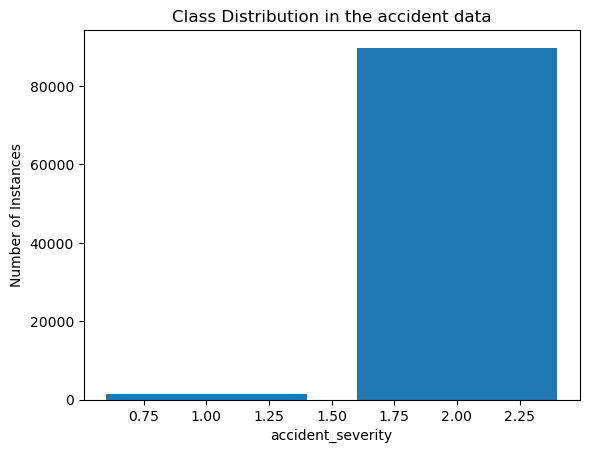

In [2179]:
# checking for balancing
class_distribution = accident_df_clean['accident_severity'].value_counts()

# Visualizing the class distribution using a bar plot
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('accident_severity')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in the accident data')
plt.show()

In [2180]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
A = accident_df_clean.drop('accident_severity', axis=1)
B = accident_df_clean['accident_severity']

# Initialize the RandomOverSampler
undersampler = RandomUnderSampler(random_state=42)


# Resample the data to balance the classes
A_resampled, B_resampled = undersampler.fit_resample(A, B)

# Create a new DataFrame with balanced classes
balanced_accident_df = pd.concat([A_resampled, B_resampled], axis=1)

# Print the class distribution after resampling
print(balanced_accident_df['accident_severity'].value_counts())

1    1390
2    1390
Name: accident_severity, dtype: int64


In [2181]:
balanced_accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_severity
0,2020010228038,2020,010228038,553007.0,190580.0,0.207510,51.593297,1,1,1,...,4,7,2,0.0,0.0,2,1,2.0,E01002337,1
1,2020010228301,2020,010228301,509181.0,172567.0,-0.430454,51.441583,1,1,1,...,4,1,1,0.0,0.0,2,1,2.0,E01002596,1
2,2020010228334,2020,010228334,509650.0,184487.0,-0.420010,51.548632,1,2,1,...,6,2,2,0.0,0.0,1,1,2.0,E01002494,1
3,2020010229060,2020,010229060,534071.0,176697.0,-0.070962,51.473359,1,1,1,...,1,1,1,0.0,0.0,1,1,2.0,E01004067,1
4,2020010229841,2020,010229841,527080.0,176147.0,-0.171763,51.470029,1,2,1,...,4,1,1,0.0,0.0,1,1,2.0,E01004541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2020440367954,2020,440367954,446896.0,110336.0,-1.334620,50.890603,44,3,1,...,1,1,1,0.0,0.0,2,1,2.0,E01022656,2
2776,2020440386295,2020,440386295,463860.0,100804.0,-1.095119,50.803273,44,2,1,...,1,1,2,0.0,0.0,1,1,2.0,E01017038,2
2777,2020522000466,2020,522000466,363935.0,175537.0,-2.520697,51.477632,52,2,1,...,1,9,1,0.0,0.0,1,2,2.0,E01014629,2
2778,2020010286184,2020,010286184,523754.0,175765.0,-0.219758,51.467332,1,2,1,...,1,2,2,0.0,0.0,1,1,2.0,E01004606,2


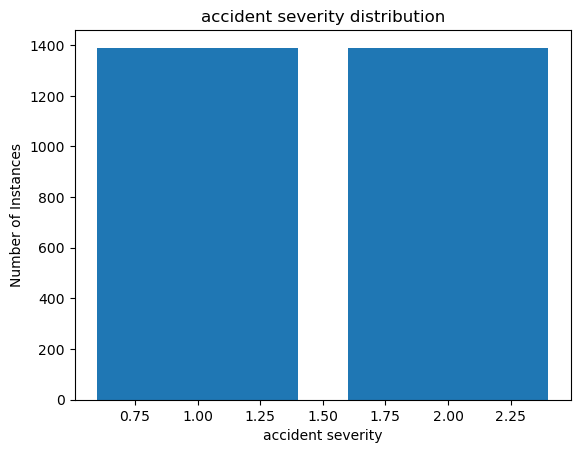

In [2182]:
class_distribution = balanced_accident_df['accident_severity'].value_counts()

# Visualize the class distribution using a bar plot
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('accident severity')
plt.ylabel('Number of Instances')
plt.title('accident severity distribution')
plt.show()

### train and test data

In [2183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Splitting features and target
X_1 = balanced_accident_df.drop(['accident_severity', 'accident_index', 'accident_year', 'accident_reference', 'date', 'time', 'lsoa_of_accident_location', 'local_authority_ons_district', 'local_authority_highway', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'first_road_number', 'second_road_number', 'trunk_road_flag', 'number_of_vehicles', 'day_of_week', 'local_authority_district', 'first_road_class', 'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'urban_or_rural_area', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'number_of_casualties', 'second_road_class'], axis=1)
y = balanced_accident_df['accident_severity']

# Scaling features
#scaled_data = scaler.fit_transform(X_1)
X = pd.DataFrame(X_1, columns=X_1.columns)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)


In [2184]:
from sklearn.feature_selection import mutual_info_classif  # Use mutual_info_regression for regression tasks


# Load or create your dataset


# Calculate mutual information between each feature and the target variable
mi_scores = mutual_info_classif(X, y)

# Print the feature importance scores
for i, score in enumerate(mi_scores):
    print(f"Feature {i+1}: {score:.4f}")

Feature 1: 0.0209
Feature 2: 0.0592
Feature 3: 0.0513
Feature 4: 0.0092
Feature 5: 0.0320
Feature 6: 0.0000
Feature 7: 0.0000
Feature 8: 0.0048
Feature 9: 0.0120


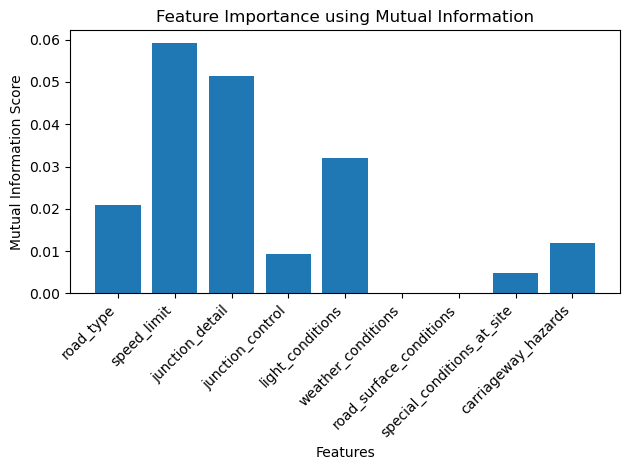

In [2185]:
feature_names = list(X.columns)

plt.bar(range(len(mi_scores)), mi_scores, tick_label = feature_names)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Feature Importance using Mutual Information")
plt.tight_layout()
plt.show()

In [2186]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

# Train classifier using all features
gbc.fit(X_train, y_train)

# Make predictions
preds = gbc.predict(X_test)

# Evaluate the model using the F1-score
f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)

print(f1_score_all)

0.669


In [2187]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [2188]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 10):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 3)
    
    f1_score_list.append(f1_score_kbest)

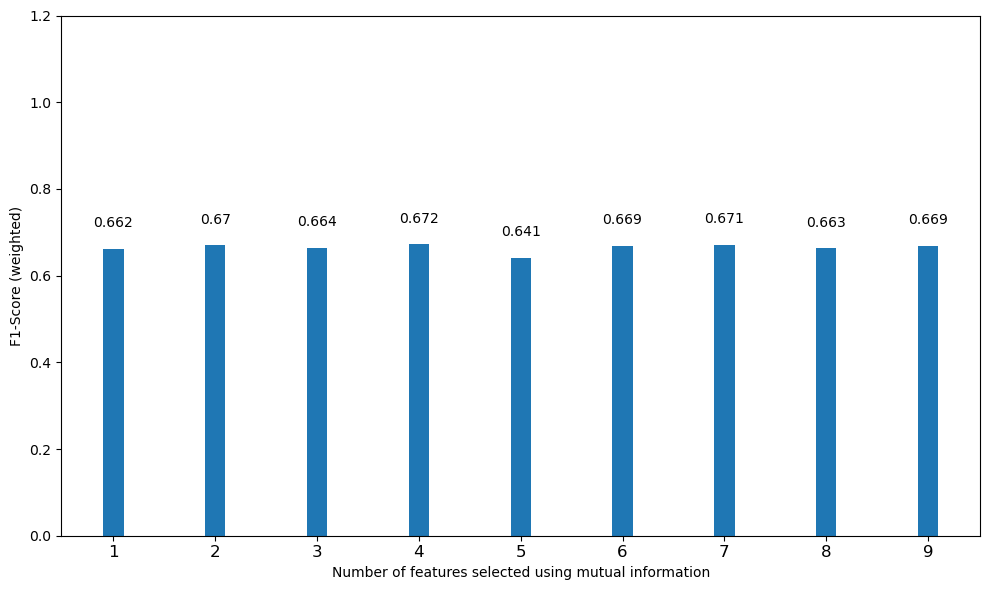

In [2189]:
x = np.arange(1, 10)
y = f1_score_list

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 10))
ax.set_xticklabels(np.arange(1, 10), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()
plt.show()

In [2190]:
selector = SelectKBest(mutual_info_classif, k=5)

# Fitting the selector on the training data
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'carriageway_hazards'],
      dtype='object')

In [2191]:
selector = SelectKBest(mutual_info_classif, k=8)


selector.fit(X_train_v2, y_train_v2)

# Transforming the training and testing data to include only the selected features
X_train_selected = selector.transform(X_train_v2)
X_test_selected = selector.transform(X_test_v2)

In [2192]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2193]:
len(X_train_selected)

1946

In [2194]:
len(y_train)

1946

In [2195]:
# Create a KNN classifier with 15 neighbors
knn = KNeighborsClassifier(n_neighbors=57)

# Fit the classifier to the data
knn.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=57)

In [2196]:
knn.score(X_test_selected, y_test)

0.6738609112709832

### Model complexity & Over/Underfitting

In [2197]:

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 100)
for neighbor in neighbors:
    
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_selected, y_train)
    train_accuracies[neighbor] = knn.score(X_train_selected, y_train)
    test_accuracies[neighbor] = knn.score(X_test_selected, y_test)

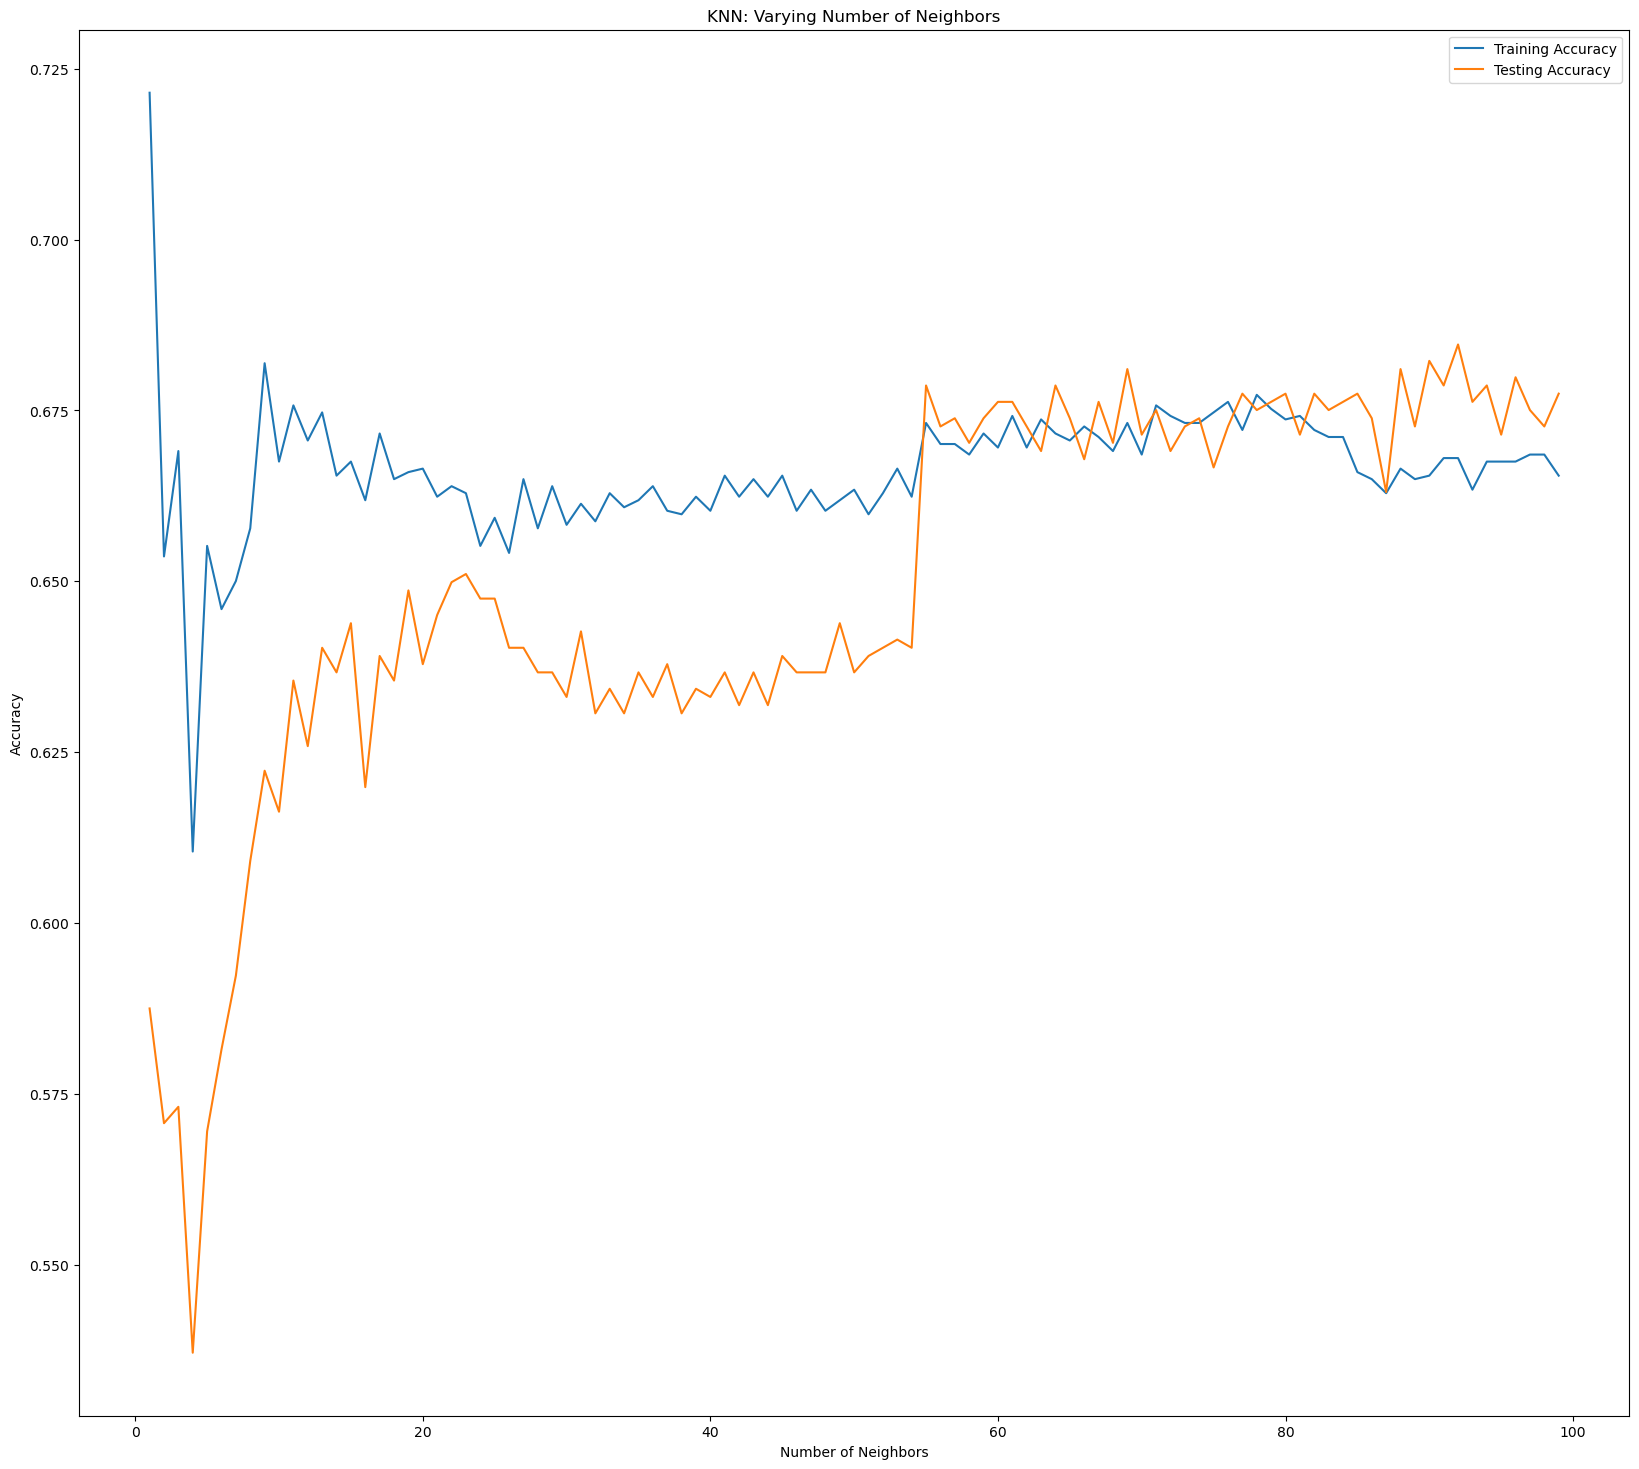

In [2198]:
plt.figure(figsize=(20,18))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Plot Confusion Matrix

In [2199]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test_selected)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[280, 137],
       [132, 285]])

Text(58.222222222222214, 0.5, 'Truth')

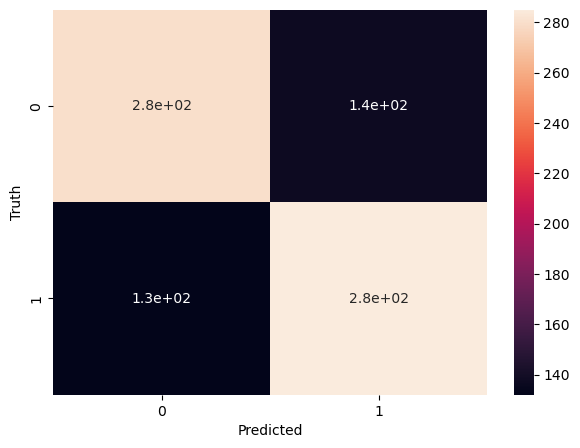

In [2200]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### precesion, recall and f1-score for each classes

In [2201]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.67      0.68       417
           2       0.68      0.68      0.68       417

    accuracy                           0.68       834
   macro avg       0.68      0.68      0.68       834
weighted avg       0.68      0.68      0.68       834



In [2202]:
con.close()